# Used Car Price Prediction

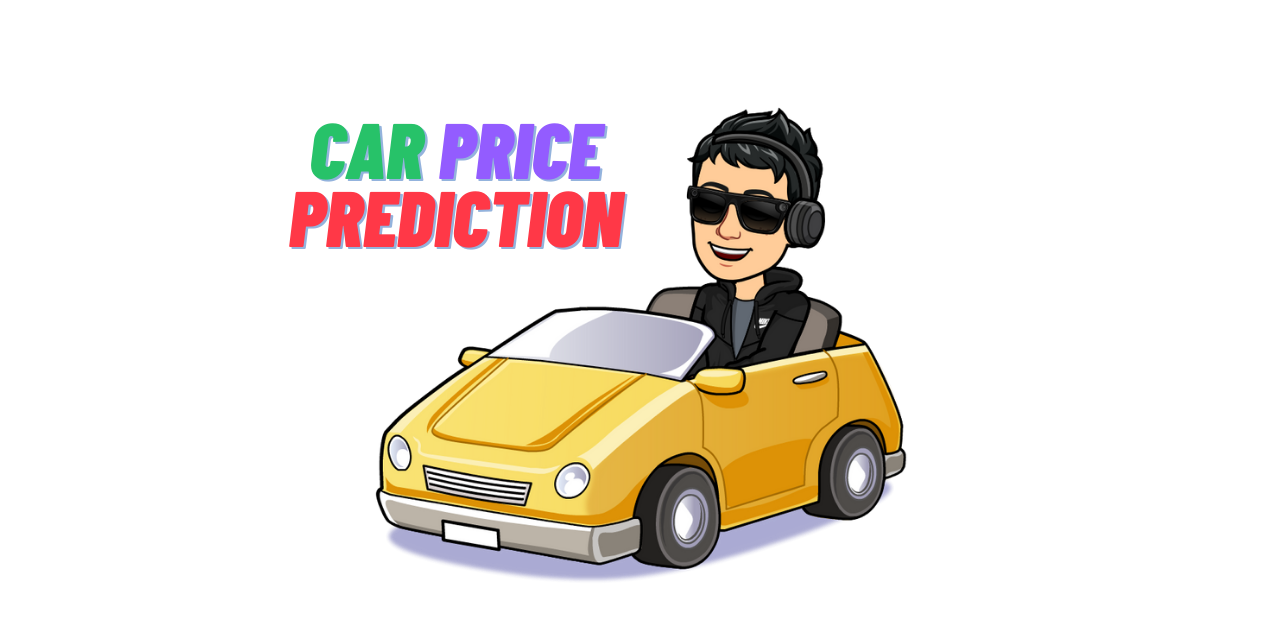

## Problem Statement:
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-

### 1. Data Collection Phase
I have done web scraping to collect the data of used cars from the well known website www.cardekho.com where I found more features of cars compared to other websites and I fetch data for different locations. As per the requirement of our client we need to build the model to predict the prices of these used cars.

### 2. Model Building Phase
After collecting the data, I need to build a machine learning model. Before model building we need to do all data pre-processing steps. The complete life cycle of data science that I have used in this project are as follows:

1. Data Cleaning

2. Exploratory Data Analysis

3. Data Pre-processing

4. Model Building

5. Model Evaluation

6. Selecting the best model

### Importing necessary libraries/dependencies

In [1]:
# Preprocessing
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
from scipy.stats import zscore   # To remove outliers
from sklearn.preprocessing import PowerTransformer  # To remove skewness
# Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
# ML Algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
df = pd.read_excel("Used_Cars.xlsx")
df

Unnamed: 0                   Car_Name Fuel_type Running_in_kms  \
0              0    2018 Maruti Swift Dzire    Diesel     55,435 kms   
1              1    2019 Maruti Swift Dzire    Petrol      9,386 kms   
2              2    2019 Maruti Swift Dzire    Petrol     11,980 kms   
3              3            2018 Honda City    Petrol     89,294 kms   
4              4         2016 Maruti Baleno    Petrol     37,977 kms   
...          ...                        ...       ...            ...   
9672        9672     2015 Hyundai Grand i10    Diesel   2,40,000 kms   
9673        9673        2007 Maruti Wagon R    Diesel     91,348 kms   
9674        9674           2017 Tata Indica    Diesel   1,00,000 kms   
9675        9675  2008 Toyota Corolla Altis    Diesel   2,80,400 kms   
9676        9676      2012 Mahindra Scorpio    Petrol     28,320 kms   

     Endine_disp Gear_transmission Milage_in_km/ltr Seating_cap  \
0          1248             Manual        28.4 kmpl           5   
1          1197             Manual          22 kmpl           5   
2          1197             Manual       21.21 kmpl           5   
3          1497             Manual        17.4 kmpl           5   
4          1197          Automatic        21.4 kmpl           5   
...          ...               ...              ...         ...   
9672       1197             Manual        18.9 kmpl           5   
9673        998             Manual        18.9 kmpl           5   
9674       1405             Manual       17.88 kmpl           5   
9675       1798             Manual       14.53 kmpl           5   
9676       2179             Manual        13.5 kmpl           5   

                  color Max_power  ... rear_brake_type cargo_volume height  \
0                  Grey     74.02  ...            Drum          378   1515   
1                 White     81.80  ...            Drum          378   1515   
2                  Grey     81.80  ...            Drum          378   1515   
3          Golden brown     117.6  ...            Drum          510   1495   
4     Pearl Phoenix Red      83.1  ...            Drum   339-litres   1510   
...                 ...       ...  ...             ...          ...    ...   
9672                  -       82   ...            Drum            -   1520   
9673                Red     67.1   ...            Drum            -   1700   
9674              White    48.21   ...            Drum            -   1485   
9675                  -    138.1   ...      Solid Disc            -   1475   
9676              White      115   ...            Drum            -   1874   

     width length  Weight Insp_score top_speed  \
0     1735   3995  1405Kg          -         -   
1     1735   3995  1315Kg        9.5         -   
2     1735   3995  1315Kg        9.5         -   
3     1695   4440    1436          9  189 kmph   
4     1745   3995    1360          -  180 Kmph   
...    ...    ...     ...        ...       ...   
9672  1660   3765       -          -  163 Kmph   
9673  1495   3595    1350          -         -   
9674  1665   3690       -          -  149 Kmph   
9675  1776   4620       -          -  205km/hr   
9676  1850   5098    2550          -  153km/hr   

                                             City_url Car_price  
0     https://www.cardekho.com/used-cars+in+ahmedabad  7,45,000  
1     https://www.cardekho.com/used-cars+in+ahmedabad  6,50,000  
2     https://www.cardekho.com/used-cars+in+ahmedabad  6,41,000  
3     https://www.cardekho.com/used-cars+in+ahmedabad  7,65,000  
4     https://www.cardekho.com/used-cars+in+ahmedabad  5,95,000  
...                                               ...       ...  
9672       https://www.cardekho.com/used-cars+in+pune  4,60,000  
9673       https://www.cardekho.com/used-cars+in+pune  1,10,000  
9674       https://www.cardekho.com/used-cars+in+pune  2,00,000  
9675       https://www.cardekho.com/used-cars+in+pune  2,00,000  
9676       https://www.cardekho.com/used-cars+in+pune  5,25,000  

[9677

Here I am importing the data set which is in excel format and storing it into dataframe (df) for further usage. Here we can observe first 5 and last 5 rows of the dataset. There are 9677 rows and 21 columns in the dataframe. The dataset contains both numerical and categorical data. There are both dependent and independent variables present in the dataframe. We have our target variable "Car_Price" which stores the price of the used cars and it is continuous in nature which makes this to be a "Regression Problem"

## Data Description (Attribute Information)

|Serial No||Variable||Definition|
|--------------------||--------------------||--------------------|
|1||Car_Name||Name of the cars with manufacturing year|
|2||Fuel_type||Type of fuel used for car engine|
|3||Running_in_kms||Car running in kms till the date|
|4||Engine_disp||Engine displacement/engine CC|
|5||Gear_transmission||Type of gear transmission used in car|
|6||Milage_in_km/ltr||Overall milage of car in Km/ltr|
|7||Seating_cap||Number of seats available in the car|
|8||color||Color of the car|
|9||Max_power||Maximum power of engine used in car in bhp|
|10||front_brake_type||Type of brake system used for front-side wheels|
|11||rear_brake_type||Type of brake system used for back-side wheels|
|12||cargo_volume||Total cubic feet of space in a car's cargo area|
|13||height||Total height of car in mm|
|14||width||Width of car in mm|
|15||length||Total length of the car in mm|
|16||Weight||Gross weight of the car in kg|
|17||Insp_score||Inspection rating out of 10|
|18||top_speed||Maximum speed limit of the car in km per hours|
|19||City_url||Url of the page of cars from a particular city/location|
|20||Car_price||Price of the car|

## Exploratory Data Analysis (EDA)

In [3]:
# To display maximum columns in the dataset
pd.set_option("display.max_columns",None)
# To display maximum rows in the dataset
pd.set_option("display.max_rows",None)

In [4]:
# Dropping unwanted column
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()   # Displaying the dataframe

Car_Name Fuel_type Running_in_kms Endine_disp  \
0  2018 Maruti Swift Dzire    Diesel     55,435 kms       1248    
1  2019 Maruti Swift Dzire    Petrol      9,386 kms       1197    
2  2019 Maruti Swift Dzire    Petrol     11,980 kms       1197    
3          2018 Honda City    Petrol     89,294 kms       1497    
4       2016 Maruti Baleno    Petrol     37,977 kms       1197    

  Gear_transmission Milage_in_km/ltr Seating_cap              color Max_power  \
0            Manual        28.4 kmpl           5               Grey     74.02   
1            Manual          22 kmpl           5              White     81.80   
2            Manual       21.21 kmpl           5               Grey     81.80   
3            Manual        17.4 kmpl           5       Golden brown     117.6   
4         Automatic        21.4 kmpl           5  Pearl Phoenix Red      83.1   

  front_brake_type rear_brake_type cargo_volume height width length  Weight  \
0             Disc            Drum          378   1515  1735   3995  1405Kg   
1  Ventilated Disc            Drum          378   1515  1735   3995  1315Kg   
2             Disc            Drum          378   1515  1735   3995  1315Kg   
3  Ventilated Disc            Drum          510   1495  1695   4440    1436   
4             Disc            Drum   339-litres   1510  1745   3995    1360   

  Insp_score top_speed                                         City_url  \
0          -         -  https://www.cardekho.com/used-cars+in+ahmedabad   
1        9.5         -  https://www.cardekho.com/used-cars+in+ahmedabad   
2        9.5         -  https://www.cardekho.com/used-cars+in+ahmedabad   
3          9  189 kmph  https://www.cardekho.com/used-cars+in+ahmedabad   
4          -  180 Kmph  https://www.cardekho.com/used-cars+in+ahmedabad   

  Car_price  
0  7,45,000  
1  6,50,000  
2  6,41,000  
3  7,65,000  
4  5,95,000

Removed unwanted column "Unnamed: 0" from the dataset since it was only storing the index data and was not a worthy feature column for prediction. We can observe first 5 rows of the dataset.

In [5]:
# Checking the dimensions of the dataset
print("There are {} rows and {} columns in our dataframe".format(df.shape[0], df.shape[1]))

There are 9677 rows and 20 columns in our dataframe


The dataset contains 9677 rows and 20 columns. Out of 20 columns 19 are independent variables and remaining one is our target variable "Car_price" which is dependent in nature.

In [6]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",df.columns)

Columns present in our dataset:
 Index(['Car_Name', 'Fuel_type', 'Running_in_kms', 'Endine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'height', 'width', 'length', 'Weight', 'Insp_score', 'top_speed',
       'City_url', 'Car_price'],
      dtype='object')


These are the columns present in our dataset.

In [7]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

No of Unique Values
Car_Name                          1339
Fuel_type                            5
Running_in_kms                    4074
Endine_disp                        147
Gear_transmission                    2
Milage_in_km/ltr                   515
Seating_cap                         10
color                              395
Max_power                          647
front_brake_type                    30
rear_brake_type                     33
cargo_volume                       313
height                             298
width                              284
length                             380
Weight                             300
Insp_score                          12
top_speed                          292
City_url                            12
Car_price                         1744

Above are the number of unique values present in each of the columns of the dataset.

In [8]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9677 entries, 0 to 9676
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           9677 non-null   object
 1   Fuel_type          9677 non-null   object
 2   Running_in_kms     9677 non-null   object
 3   Endine_disp        9677 non-null   object
 4   Gear_transmission  9667 non-null   object
 5   Milage_in_km/ltr   9677 non-null   object
 6   Seating_cap        9641 non-null   object
 7   color              9677 non-null   object
 8   Max_power          9671 non-null   object
 9   front_brake_type   9640 non-null   object
 10  rear_brake_type    9640 non-null   object
 11  cargo_volume       9643 non-null   object
 12  height             9640 non-null   object
 13  width              9640 non-null   object
 14  length             9640 non-null   object
 15  Weight             9658 non-null   object
 16  Insp_score         9677 non-null   object


- This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.
- The dataset contains object type data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.
- Since counts of some of the columns are different, which means there are null values present in the dataset.

## Data Pre-processing

From our dataset we can notice most of the columns contains corrupted values so that we need to go through lot of data-processing steps. Let's do some of the pre-processing methods on our dataset.

From the dataset we can observe there are some columns having values with "-" sign, so we will treat them as NAN values. Let's take a quick look at the columns having "-" sign by using below code.

In [9]:
# Checking which columns contains "-" sign 
df[df.columns[(df == '-').any()]].nunique()

Endine_disp         147
Milage_in_km/ltr    515
Seating_cap          10
color               395
Max_power           647
front_brake_type     30
rear_brake_type      33
cargo_volume        313
height              298
width               284
length              380
Weight              300
Insp_score           12
top_speed           292
dtype: int64

These are the columns having "-" sign with number of unique values present in the particular column.

In [10]:
# Displaying the columns containing "-" sign count and their % i.e. ((count of "-")/9677)/100

unwanted_value = pd.DataFrame(df.isin(["-"]).sum().sort_values(ascending=False))
unwanted_value.columns=['Count of "-"']
unwanted_value['% of "-" sign']=unwanted_value['Count of "-"']/96.77     # 9677)/100 = 96.77
unwanted_value

Count of "-"  % of "-" sign
Insp_score                 8154      84.261651
Weight                     4997      51.637904
top_speed                  3340      34.514829
cargo_volume               2157      22.289966
color                       701       7.243981
width                       280       2.893459
height                      277       2.862457
length                      277       2.862457
Milage_in_km/ltr            267       2.759120
rear_brake_type             262       2.707451
front_brake_type            258       2.666116
Max_power                   213       2.201095
Seating_cap                 170       1.756743
Endine_disp                 168       1.736075
City_url                      0       0.000000
Car_Name                      0       0.000000
Fuel_type                     0       0.000000
Gear_transmission             0       0.000000
Running_in_kms                0       0.000000
Car_price                     0       0.000000

From the above output we can notice the columns having "-" sign. The columns "Insp_score" and "Weight" have more than 50% of "-" sign. So, we cna drop those columns. And we will treat the remaining columns having these sign as NAN values, so that we can easily treat them using appropriate imputation techniques.

In [11]:
# Dropping the columns having more than 50% of "-" sign
df.drop(["Insp_score", "Weight"],axis=1,inplace=True)

I have dropped the columns which are not necessary to our predictions.

The column Max_power contains the value as "null", let's take a look at the sum of the entries with "null" in this column and then we will replace them with NAN values.

In [12]:
# Checking entries with "null" in the column Max_power
df.Max_power.isin(["null "]).sum()

16

So, there are 16 columns with "null" entries.

Now, let's replace the columns having "-" sign and "null" entries into NAN values.

In [13]:
# Replacing the sign as NAN values
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

I have replaced "-" sign and the entry "null" as nan value.

## Feature Engineering
Some of the features like "Car_Name", "Running_in_kms", "Milage_in_km/ltr", "City_url", "Max_power", "front_brake_type", "rear_brake_type", "Car_price" etc have some irrelevant values like kms, kmpl etc which we need to clean

## Car_Name
The column Car_Name is containing manufacturing year of the car, Brand name of the car and model name of the car. So, I will be extracting 3 different columns from the column Car_Name.

In [14]:
# Extracting the feature "Manufacturing_year" from Car_Name column
df['Manufacturing_year'] = df['Car_Name'].str[0:4]

# Creating car_name column and storing the remaining values other than year in it. 
df['Car_name'] = df['Car_Name'].str[4:]

# Dropping Car_Name column as I have stored the data in car_name column instead
df.drop(columns = 'Car_Name', axis=1, inplace = True)

In [15]:
# Extracting Brand and Model from Car_name column
df['Brand'] = df.Car_name.str.split(' ').str.get(1)
df['Model'] = df.Car_name.str.split(' ').str[2:]
df['Model'] = df['Model'].apply(lambda x: ','.join(map(str, x)))
df['Model'] = df['Model'].str.replace(',',' ')
df.drop(columns = 'Car_name', axis=1, inplace = True)     # Dropping Car_name column after extraction

In [16]:
# Moving the columns Model, Brand and Manufacturing_year to the first, second & third position of dataframe respectively
df.insert(0, 'Model',df.pop('Model'))
df.insert(1, 'Brand',df.pop('Brand'))
df.insert(2, 'Manufacturing_year',df.pop('Manufacturing_year'))
df.head()

Model   Brand Manufacturing_year Fuel_type Running_in_kms  \
0  Swift Dzire  Maruti               2018    Diesel     55,435 kms   
1  Swift Dzire  Maruti               2019    Petrol      9,386 kms   
2  Swift Dzire  Maruti               2019    Petrol     11,980 kms   
3         City   Honda               2018    Petrol     89,294 kms   
4       Baleno  Maruti               2016    Petrol     37,977 kms   

  Endine_disp Gear_transmission Milage_in_km/ltr Seating_cap  \
0       1248             Manual        28.4 kmpl           5   
1       1197             Manual          22 kmpl           5   
2       1197             Manual       21.21 kmpl           5   
3       1497             Manual        17.4 kmpl           5   
4       1197          Automatic        21.4 kmpl           5   

               color Max_power front_brake_type rear_brake_type cargo_volume  \
0               Grey     74.02             Disc            Drum          378   
1              White     81.80  Ventilated Disc            Drum          378   
2               Grey     81.80             Disc            Drum          378   
3       Golden brown     117.6  Ventilated Disc            Drum          510   
4  Pearl Phoenix Red      83.1             Disc            Drum   339-litres   

  height width length top_speed  \
0   1515  1735   3995       NaN   
1   1515  1735   3995       NaN   
2   1515  1735   3995       NaN   
3   1495  1695   4440  189 kmph   
4   1510  1745   3995  180 Kmph   

                                          City_url Car_price  
0  https://www.cardekho.com/used-cars+in+ahmedabad  7,45,000  
1  https://www.cardekho.com/used-cars+in+ahmedabad  6,50,000  
2  https://www.cardekho.com/used-cars+in+ahmedabad  6,41,000  
3  https://www.cardekho.com/used-cars+in+ahmedabad  7,65,000  
4  https://www.cardekho.com/used-cars+in+ahmedabad  5,95,000

As we can see, we have successfully extracted the features Manufacturing_year, Brand and Model from Car_name column and moved these columns from last position to starting position of the dataframe using pop() method.

## Running_in_kms
The column "Running_in_kms" is showing object data type since it is having some string value like kms, and "," sign in it. But it should be continuous data so, I will remove string value "kms" and the comma sign "," by replacing them with empty space and then convert the column into float data type.

In [17]:
# Replacing kms and "," sign by empty space from the column
df['Running_in_kms'] = df['Running_in_kms'].str.replace('kms','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace(',','')

In [18]:
# Checking how many "1 Lakh " entries are there in the column
df.Running_in_kms.isin(["1 Lakh "]).sum()

0

In [19]:
# Converting object data type into float data type
df['Running_in_kms'] = df['Running_in_kms'].astype('float')

I have successfully converted string values and comma sign from the column and also converted object data type of "Running_in_kms" column into float data type.

## Car_price

In [20]:
# Checking null values to confirm if the target column contains any missing values after splitting it
print("No of null values in Car_price is:",df.Car_price.isnull().sum())

No of null values in Car_price is: 0


In [21]:
df['Car_price'] = df['Car_price'].str.replace(',','')

In [22]:
df['Car_price']= df['Car_price'].astype('float')

In [23]:
# Checking dataframe after cleaning target column
df.head()

Model   Brand Manufacturing_year Fuel_type  Running_in_kms  \
0  Swift Dzire  Maruti               2018    Diesel         55435.0   
1  Swift Dzire  Maruti               2019    Petrol          9386.0   
2  Swift Dzire  Maruti               2019    Petrol         11980.0   
3         City   Honda               2018    Petrol         89294.0   
4       Baleno  Maruti               2016    Petrol         37977.0   

  Endine_disp Gear_transmission Milage_in_km/ltr Seating_cap  \
0       1248             Manual        28.4 kmpl           5   
1       1197             Manual          22 kmpl           5   
2       1197             Manual       21.21 kmpl           5   
3       1497             Manual        17.4 kmpl           5   
4       1197          Automatic        21.4 kmpl           5   

               color Max_power front_brake_type rear_brake_type cargo_volume  \
0               Grey     74.02             Disc            Drum          378   
1              White     81.80  Ventilated Disc            Drum          378   
2               Grey     81.80             Disc            Drum          378   
3       Golden brown     117.6  Ventilated Disc            Drum          510   
4  Pearl Phoenix Red      83.1             Disc            Drum   339-litres   

  height width length top_speed  \
0   1515  1735   3995       NaN   
1   1515  1735   3995       NaN   
2   1515  1735   3995       NaN   
3   1495  1695   4440  189 kmph   
4   1510  1745   3995  180 Kmph   

                                          City_url  Car_price  
0  https://www.cardekho.com/used-cars+in+ahmedabad   745000.0  
1  https://www.cardekho.com/used-cars+in+ahmedabad   650000.0  
2  https://www.cardekho.com/used-cars+in+ahmedabad   641000.0  
3  https://www.cardekho.com/used-cars+in+ahmedabad   765000.0  
4  https://www.cardekho.com/used-cars+in+ahmedabad   595000.0

As we can observe, the target column has been cleaned which is now continuous.

## Milage_in_km/ltr
The column "Milage_in_km/ltr" is also having some string values like "kmpl", "km/kg" and "km/hr" so, I will be removing/ replacing by empty space and converting column from object data type into float data type.

In [24]:
# Replacing string values by empty space
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('kmpl','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/kg','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/hr','')
# Converting object data type into float data type
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].astype('float')

## City_url
The column City_url contains the urls of the cities, so we will create a new column as Location by replacing the urls by specific city name.

In [25]:
# Checking the value  count of the column City_url
df.City_url.value_counts()

https://www.cardekho.com/used-cars+in+delhi-ncr    1480
https://www.cardekho.com/used-cars+in+bangalore    1430
https://www.cardekho.com/used-cars+in+pune         1059
https://www.cardekho.com/used-cars+in+chennai       938
https://www.cardekho.com/used-cars+in+mumbai        840
https://www.cardekho.com/used-cars+in+hyderabad     806
https://www.cardekho.com/used-cars+in+kolkata       700
https://www.cardekho.com/used-cars+in+ahmedabad     586
https://www.cardekho.com/used-cars+in+gurgaon       496
https://www.cardekho.com/used-cars+in+jaipur        465
https://www.cardekho.com/used-cars+in+noida         457
https://www.cardekho.com/used-cars+in+new-delhi     420
Name: City_url, dtype: int64

In [26]:
# Let's convert the urls into city name 
df['Location'] = df.City_url.replace('https://www.cardekho.com/used-cars+in+delhi-ncr', 'Delhi_NCR')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+bangalore', 'Bangalore')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+mumbai', 'Mumbai')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+new-delhi', 'New_Delhi')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+pune', 'Pune')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+gurgaon', 'Gurgaon')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+noida', 'Noida')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+hyderabad', 'Hyderabad')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+chennai', 'Chennai')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+kolkata', 'Kolkata')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+ahmedabad', 'Ahmedabad')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+jaipur', 'Jaipur')

In [27]:
# Checking the value counts of Location
df.Location.value_counts()

Delhi_NCR    1480
Bangalore    1430
Pune         1059
Chennai       938
Mumbai        840
Hyderabad     806
Kolkata       700
Ahmedabad     586
Gurgaon       496
Jaipur        465
Noida         457
New_Delhi     420
Name: Location, dtype: int64

We have derived Location names from City_url column so, we can drop City_url column.

In [28]:
df.drop(columns = 'City_url', axis=1, inplace = True)

## Max_power
The column "Max_power" contains some string values like PS, ps, Bh and P. Let's replace them as well and we will convert this column to float datatype.

In [29]:
# Getting numerical values from column "Max_power" and replacing the string values
df["Max_power"] = df["Max_power"].str[0:5]

df["Max_power"] = df["Max_power"].str.replace("PS",'')
df["Max_power"] = df["Max_power"].str.replace("ps",'')
df["Max_power"] = df["Max_power"].str.replace("Bh",'')
df["Max_power"] = df["Max_power"].str.replace("P",'')
df["Max_power"] = df["Max_power"].str.replace("a",'')
df["Max_power"] = df["Max_power"].str.replace("(",'')
df["Max_power"] = df["Max_power"].str.replace("k",'')
df["Max_power"] = df["Max_power"].str.replace("[",'')
df["Max_power"] = df["Max_power"].str.replace("s",'')
df["Max_power"] = df["Max_power"].str.replace("W",'')
df["Max_power"] = df["Max_power"].str.replace("hp",'')
df["Max_power"] = df["Max_power"].str.replace("H",'')

In [30]:
# Converting Max_power into float datatype
df.Max_power = df.Max_power.astype('float')

We have replaced string values present in the column Max_power and converted it into float data type as well.

## front_brake_type
The column "front_brake_type" is having some duplicate entries that is they belongs to same categories so, we will replace/group the same categories by appropriate values.

In [31]:
# Checking the value count of the column "front_brake_type"
df.front_brake_type.value_counts()

Disc                                          5591
Ventilated Disc                               3328
Solid Disc                                     102
Ventilated Discs                               101
Disc & Caliper Type                             49
Disk                                            45
Ventilated discs                                33
Ventilated DIsc                                 28
Drum                                            16
Multilateral Disc                               15
Vantilated Disc                                 14
Ventilated Disk                                 12
Disc & Drum                                      7
Disc,internally ventilated                       6
264mm Ventilated discs                           6
Ventlated Disc                                   4
Ventillated Discs                                3
disc                                             3
Booster assisted ventilated disc                 3
Disc, 236 mm                   

From the value count of the column "front_brake_type" we can observe some of the entries having similar categories, let's group them according to their category.

In [32]:
# Grouping the entries which are similar to Disc 
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)

# Grouping the entries which are similar to Ventilated Discs 
df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("264mm Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated disc","Ventilated Disc",inplace=True)

In [33]:
# Checking the value counts of the column after grouping
df["front_brake_type"].value_counts()

Disc                                          5746
Ventilated Disc                               3532
Disc & Caliper Type                             49
Drum                                            16
Multilateral Disc                               15
Disc & Drum                                      7
Disc,internally ventilated                       6
Booster assisted ventilated disc                 3
Electric Parking Brake                           2
Vacuum assisted hydraulic dual circuit w         2
Single Piston Sliding Caliper, Vented Disc       1
Disc brakes                                      1
Caliper Ventilated Disc                          1
Disc Brakes with Inner cooling                   1
Name: front_brake_type, dtype: int64

## rear_brake_type

In [34]:
# Checking the value counts of the column "rear_brake_type"
df.rear_brake_type.value_counts()

Drum                                          7279
Disc                                          1306
Ventilated Disc                                271
Solid Disc                                     181
Leading-Trailing Drum                           68
Disc & Caliper Type                             49
Discs                                           46
Self-Adjusting Drum                             41
Ventilated discs                                32
Ventilated Discs                                19
Leading & Trailing Drum                         18
Drums                                           11
Ventilated Drum                                  8
Disc & Drum                                      6
Self Adjusting Drum                              6
262mm Disc & Drum Combination                    6
Drums 180 mm                                     3
self adjusting drums                             3
drum                                             3
Booster assisted drum          

With the help of value count funtion we can notice some of the entries in the column "rear_brake_type" having similar categories, let's group them.

In [35]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)

df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Discs","Disc",inplace=True)

df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)

df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)

df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting drums","Self-Adjusting Drum",inplace=True)

df["rear_brake_type"].replace("262mm Disc & Drum Combination","Disc & Drum",inplace=True)

df["rear_brake_type"].replace("Drum in Discs","Drum in disc",inplace=True)

In [36]:
# Checking the value counts of the column after grouping
df.front_brake_type.value_counts()

Disc                                          5746
Ventilated Disc                               3532
Disc & Caliper Type                             49
Drum                                            16
Multilateral Disc                               15
Disc & Drum                                      7
Disc,internally ventilated                       6
Booster assisted ventilated disc                 3
Electric Parking Brake                           2
Vacuum assisted hydraulic dual circuit w         2
Single Piston Sliding Caliper, Vented Disc       1
Disc brakes                                      1
Caliper Ventilated Disc                          1
Disc Brakes with Inner cooling                   1
Name: front_brake_type, dtype: int64

We have now grouped the similar categories present in the columns.

From the dataset we can also observe some of the features like "Engine_disp", "height", "width", "length", "Weight", "top_speed", and "Seating_cap" have numeircal data (float type) but due to the presence of "," sign, it's showing object datatype. Let's replace "," sign by empty space and convert the columns into float datatype as these columns contains continuous data.

# Endine_disp

In [37]:
# Converting "Engine_disp" column from object to float data type as it is containing continuous data
df.Endine_disp = df.Endine_disp.astype('float')

## height

In [38]:
# Replacing "," sign by empty space and "-" by in the column "height"
df['height'] = df['height'].str.replace(',','')
df['height'] = df['height'].str[0:4]   # Getting numerical entries

# Converting the column into float data type
df.height = df.height.astype('float')

## width & length

In [39]:
# Replacing "," sign by empty space in the columns "width" & "length"
df['width'] = df['width'].str.replace(',','')
df['length'] = df['length'].str.replace(',','')

# Converting the columns into float data type
df.width = df.width.astype('float')
df.length = df.length.astype('float')

## cargo_volume

In [42]:
# Getting numerical values from cargo_volume column
df['cargo_volume'] = df['cargo_volume'].str.replace(',','')
df['cargo_volume'] = df['cargo_volume'].str.replace('-','')
df['cargo_volume'] = df['cargo_volume'].str.replace('L','')
df['cargo_volume'] = df['cargo_volume'].str.replace('l','')
df['cargo_volume'] = df['cargo_volume'].str.replace('i','')
df['cargo_volume'] = df['cargo_volume'].str.replace('t','')
df['cargo_volume'] = df['cargo_volume'].str.replace('r','')
df['cargo_volume'] = df['cargo_volume'].str.replace('e','')
df['cargo_volume'] = df['cargo_volume'].str.replace('s','')
df['cargo_volume'] = df['cargo_volume'].str[0:4]

# Converting the column into float datatype
df.cargo_volume = df.cargo_volume.astype('float')

## top_speed

In [53]:
# Getting numerical values from "top_speed" column
df['top_speed'] = df['top_speed'].str[0:3]

# Converting column into float datatype
df.top_speed = df.top_speed.astype('float')

## Seating_cap

In [44]:
# Converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

## Manufacturing_year
The column "Manufacturing_year" give the car made year, here using "Manufacturing_year" column I will be extracting new column as "Car_age" which shows us that how old the car is.

In [45]:
# Checking the value counts of the column "Manufacturing_year"
df.Manufacturing_year.value_counts()

2016    1136
2017    1120
2018    1109
2015    1053
2014     913
2013     844
2019     724
2012     629
2020     532
2011     461
2010     354
2021     268
2009     204
2008     159
2007      92
2006      29
2005      13
2022      10
2004       9
2002       7
2003       4
2001       4
2000       2
1981       1
Name: Manufacturing_year, dtype: int64

With the help of value count function we can notice that the dataset contains the cars whose manufactured year starts from 1981-2022. So, we will subtract the cars' made year from 2022 to get the exact age of the cars. Also, we need to convert the column from object datatype into float datatype as it is continuous data.

In [46]:
# Converting the column into float datatype
df.Manufacturing_year = df.Manufacturing_year.astype('float')

# Subtracting the Manufacturing_year from year 2021 to extract the column "Car_age" 
df['Car_age'] = 2022 - df['Manufacturing_year']

# Dropping the column "Manufacturing_year" as we have extracted age of the cars
df.drop(columns = 'Manufacturing_year', inplace = True)

Let's check the datatypes of the features after featuring engineering.

In [47]:
# Checking the datatypes of the columns
df.dtypes

Model                 object
Brand                 object
Fuel_type             object
Running_in_kms       float64
Endine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap          float64
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
cargo_volume         float64
height               float64
width                float64
length               float64
top_speed             object
Car_price            float64
Location              object
Car_age              float64
dtype: object

As we can notice after processing our data, the dataset contains object and float types of data. We need to encode the columns having object datatype using appropriate encoding methods before building our ML model.

In [48]:
# Saving the cleaned data into excel file
df.to_excel("Cleaned_used_cars_data.xlsx")

## Checking null values in the dataset

In [49]:
# Displaying the columns containing null values count and their % i.e. ((count of null)/9677)/100

df_null = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum().sort_values(ascending=False))
df_null.columns=['Count of Null Values']
df_null['% of Null Values']=df_null['Count of Null Values']/96.77     # 9677/100 = 96.77
df_null

Count of Null Values  % of Null Values
top_speed                          3450         35.651545
cargo_volume                       2191         22.641314
color                               701          7.243981
width                               317          3.275809
height                              314          3.244807
length                              314          3.244807
rear_brake_type                     299          3.089801
front_brake_type                    295          3.048465
Milage_in_km/ltr                    267          2.759120
Max_power                           235          2.428439
Seating_cap                         206          2.128759
Endine_disp                         168          1.736075
Gear_transmission                    10          0.103338

Above are the columns containing missing values. We will treat these null values using appropriate imputation techniques.

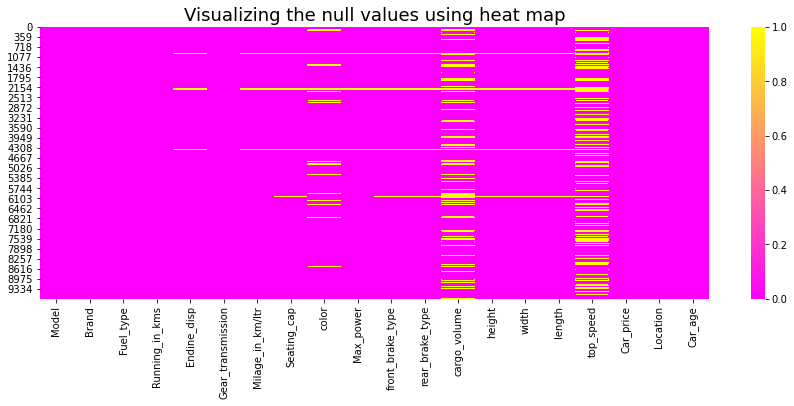

In [50]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="spring")
plt.title("Visualizing the null values using heat map",fontsize=18)
plt.show()

From the heat map we can clearly notice the presence of missing values by looking at the white lines present in the map.

## Treating null values using imputation techniqies

In [51]:
df.skew()

Running_in_kms      11.694365
Endine_disp          1.785888
Milage_in_km/ltr     3.099392
Seating_cap          2.494477
Max_power           26.353138
cargo_volume         1.530699
height               1.285488
width                0.825023
length               0.300928
Car_price            4.981324
Car_age              0.629689
dtype: float64

The following columns

- Engine_disp
- Milage_in_km/ltr
- Max_power
- height
- width
- length
and
- top_speed

have continuous data and contains more skewness and outliers so that we can fill the null values with median in these columns except the column "length" which has no outliers so, we can fill the missing values with mean.

The remaining columns such as

- Seating_cap
- Gear_transmission
- color
- front_brake_type and
- rear_brake_type

have categorical data so that we can replace the null values with most frequently occurred values that is mode value.

In [54]:
# Checking mean value of the column "length"
print("The mean value of 'length' is:",df["length"].mean())

# Checking the median values of the columns "Engine_disp", "Milage_in_km/ltr", "Max_power", "height","cargo_volume", "width" and "top_speed"
print("\nThe median value of 'Engine_disp' is:",df["Endine_disp"].median())
print("The median value of 'Milage_in_km/ltr' is:",df["Milage_in_km/ltr"].median())
print("The median value of 'Max_power' is:",df["Max_power"].median())
print("The median value of 'height' is:",df["height"].median())
print("The median value of 'width' is:",df["width"].median())
print("The median value of 'top_speed' is:",df["top_speed"].median())
print("The median value of 'cargo_volume' is:",df["cargo_volume"].median())

# Checking the mode values of the categorical columns
print("\nThe mode value of 'Seating_cap' is:",df["Seating_cap"].mode())
print("The mode value of 'color' is:",df["color"].mode())
print("The mode value of 'front_brake_type' is:",df["front_brake_type"].mode())
print("The mode value of 'rear_brake_type' is:",df["rear_brake_type"].mode())
print("The mode value of 'Gear_transmission' is:",df["Gear_transmission"].mode())

The mean value of 'length' is: 4128.6650646160415

The median value of 'Engine_disp' is: 1248.0
The median value of 'Milage_in_km/ltr' is: 18.9
The median value of 'Max_power' is: 88.5
The median value of 'height' is: 1520.0
The median value of 'width' is: 1710.0
The median value of 'top_speed' is: 170.0
The median value of 'cargo_volume' is: 346.0

The mode value of 'Seating_cap' is: 0    5.0
dtype: float64
The mode value of 'color' is: 0    White
dtype: object
The mode value of 'front_brake_type' is: 0    Disc
dtype: object
The mode value of 'rear_brake_type' is: 0    Drum
dtype: object
The mode value of 'Gear_transmission' is: 0    Manual
dtype: object


These are the mean, median and mode values. These values will be filled in the place of missing values while we impute them.

In [55]:
# Filling null values in the column "length" by mean value as it does not contains any outliers and skewness
df["length"] = df["length"].fillna(df["length"].mean())

# Filling null values in the remaining numerical columns using median values as these columns contains outliers 
for i in ['Endine_disp','Milage_in_km/ltr','height','Max_power','cargo_volume','width','length','top_speed']:
    df[i] = df[i].fillna(df[i].median())
    
# Filling null values in the categorical columns using mode values
for j in ['Seating_cap','front_brake_type','Gear_transmission','rear_brake_type','color']:
    df[j] = df[j].fillna(df[j].mode()[0])

In [56]:
# Checking missing values after using imputation techniques
df.isnull().sum()

Model                0
Brand                0
Fuel_type            0
Running_in_kms       0
Endine_disp          0
Gear_transmission    0
Milage_in_km/ltr     0
Seating_cap          0
color                0
Max_power            0
front_brake_type     0
rear_brake_type      0
cargo_volume         0
height               0
width                0
length               0
top_speed            0
Car_price            0
Location             0
Car_age              0
dtype: int64

We have successfully imputed the null values using mean, median and mode methods.

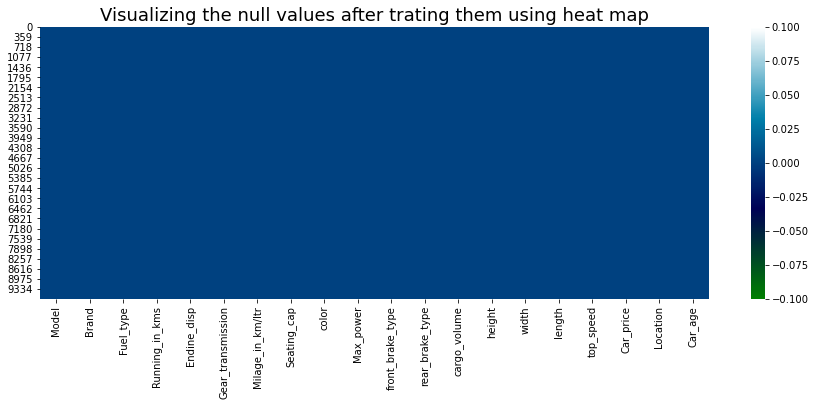

In [57]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="ocean")
plt.title("Visualizing the null values after trating them using heat map",fontsize=18)
plt.show()

It is clear from the heat map that there are no null values in any of the column.

In [58]:
# Checking the uniqueness of target column
df["Car_price"].unique()

array([ 745000.,  650000.,  641000., ...,  534000.,  749500., 1415000.])

These are the unique values present in the target column.

Great!!! We have successfully cleaned our dataset. Let's take a look at the dataset after cleaning.

In [59]:
# Let's check the dataframe after cleaning 
df.head()

Model   Brand Fuel_type  Running_in_kms  Endine_disp  \
0  Swift Dzire  Maruti    Diesel         55435.0       1248.0   
1  Swift Dzire  Maruti    Petrol          9386.0       1197.0   
2  Swift Dzire  Maruti    Petrol         11980.0       1197.0   
3         City   Honda    Petrol         89294.0       1497.0   
4       Baleno  Maruti    Petrol         37977.0       1197.0   

  Gear_transmission  Milage_in_km/ltr  Seating_cap              color  \
0            Manual             28.40          5.0               Grey   
1            Manual             22.00          5.0              White   
2            Manual             21.21          5.0               Grey   
3            Manual             17.40          5.0       Golden brown   
4         Automatic             21.40          5.0  Pearl Phoenix Red   

   Max_power front_brake_type rear_brake_type  cargo_volume  height   width  \
0      74.02             Disc            Drum         378.0  1515.0  1735.0   
1      81.80  Ventilated Disc            Drum         378.0  1515.0  1735.0   
2      81.80             Disc            Drum         378.0  1515.0  1735.0   
3     117.60  Ventilated Disc            Drum         510.0  1495.0  1695.0   
4      83.10             Disc            Drum         339.0  1510.0  1745.0   

   length  top_speed  Car_price   Location  Car_age  
0  3995.0      170.0   745000.0  Ahmedabad      4.0  
1  3995.0      170.0   650000.0  Ahmedabad      3.0  
2  3995.0      170.0   641000.0  Ahmedabad      3.0  
3  4440.0      189.0   765000.0  Ahmedabad      4.0  
4  3995.0      180.0   595000.0  Ahmedabad      6.0

In [60]:
# Checking the dimensions of the dataset 
print("Shape of the dataset is:",df.shape)

Shape of the dataset is: (9677, 20)


After cleaning the data we have left with 20 columns and 9677 rows.

## Description of Dataset

In [61]:
# Statistical summary of dataset
df.describe()

Running_in_kms  Endine_disp  Milage_in_km/ltr  Seating_cap  \
count    9.677000e+03  9677.000000       9677.000000  9677.000000   
mean     5.633516e+04  1479.987289         19.174341     5.238917   
std      4.232004e+04   521.984394          4.195186     0.728106   
min      6.400000e+01     0.000000          0.000000     2.000000   
25%      3.092200e+04  1197.000000         17.000000     5.000000   
50%      5.200000e+04  1248.000000         18.900000     5.000000   
75%      7.400000e+04  1591.000000         21.400000     5.000000   
max      1.900000e+06  5972.000000        110.000000    14.000000   

         Max_power  cargo_volume       height        width       length  \
count  9677.000000   9677.000000  9677.000000  9677.000000  9677.000000   
mean    116.786651    363.028831  1567.686266  1730.143640  4128.665065   
std     319.962960    121.279047   116.081201   128.660305   408.282323   
min      25.400000     29.000000  1281.000000  1410.000000  3099.000000   
25%      78.900000    295.000000  1490.000000  1680.000000  3795.000000   
50%      88.500000    346.000000  1520.000000  1710.000000  3995.000000   
75%     121.000000    433.000000  1630.000000  1780.000000  4440.000000   
max    9066.000000   1780.000000  2055.000000  2220.000000  5295.000000   

         top_speed     Car_price      Car_age  
count  9677.000000  9.677000e+03  9677.000000  
mean    173.572285  8.898186e+05     6.791981  
std      22.440944  1.137334e+06     3.314291  
min      80.000000  3.500000e+04     0.000000  
25%     165.000000  3.650000e+05     4.000000  
50%     170.000000  5.500000e+05     6.000000  
75%     176.000000  8.950000e+05     9.000000  
max     293.000000  2.140000e+07    41.000000

The describe() method gives the statistical information of the dataset. The summary of this dataset looks perfect since there are no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things

- The counts of every column is same which means there are no missing values present in the dataset as we are already treated them.
- The min value for "Engine_disp", "Milage_in_km/ltr" and "Car_age" is 0, which is not realistic. And looking at the maximum values for columns "Running_in_kms", "Engine_disp", "Max_power", "width", "length", "cargo_volume", "top_speed" and "Car_Price" we can say that there are huge outliers present in our data.
- The mean value is greater than the median(50%) in the columns such as "Engine_disp", "Max_power", "length", "cargo_volume", "top_speed" and "Car_Price" have high differences which means these columns are skewed to right.
- In the column "Milage_in_km/ltr", the median value is bit greater than mean which means the data is skewed to left.

We need to remove these outliers and skewness except target column using appropriate methods before building our machine learning models.

## Separating numerical and categorical columns

In [62]:
# Separating numerical and categorical columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Model', 'Brand', 'Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Location']

Numerical columns present in the dataset are:
 ['Running_in_kms', 'Endine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'cargo_volume', 'height', 'width', 'length', 'top_speed', 'Car_price', 'Car_age']


These are the object data type and numerical type columns present in the dataset.

Now it's time to visualize the data.

## Data Visualization
## Univariate Analysis
## Plotting categorical Variables

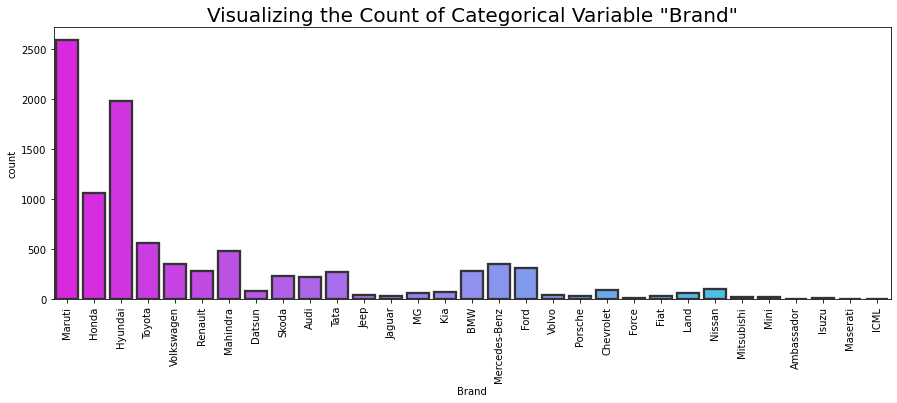

In [63]:
# Plotting count plot for categorical variable "Brand" of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "Brand"',fontsize=20)
sns.countplot(df['Brand'],palette = "cool_r", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

## Observations:
- The above count plot gives the count of cars' brand. From the graph we can conclude that we are having most of the cars from Maruti and Hyundai brand as the count is high for these brands.

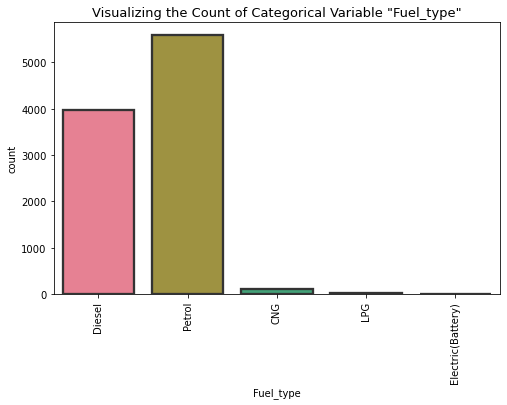

In [64]:
# Plotting count plot for categorical variable "Fuel_type" of the used cars
plt.figure(figsize=(8,5))

plt.title('Visualizing the Count of Categorical Variable "Fuel_type"',fontsize=13)
sns.countplot(df['Fuel_type'],palette ="husl", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

## Observations:
- The above plot gives the count of fuel types used by the cars. More number of cars are using petrol followed by diesel as fuel. And very few cars uses CNG, LPG and Electricity as fuel type.

Manual       7068
Automatic    2609
Name: Gear_transmission, dtype: int64


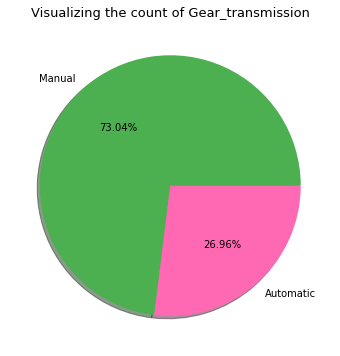

In [65]:
# Visualizing the count of Gear_transmission of the car 
print(df["Gear_transmission"].value_counts())
labels='Manual','Automatic'
colors = ["#4CAF50", "hotpink"]
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Gear_transmission'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title("Visualizing the count of Gear_transmission",fontsize=13)
plt.show()

## Observations:
- The above plot gives the count of transmission, from this graph we can notice that around 73% of the cars are with Manual gear transmission system and only 27% of the cars are with Automatic gear transmission system.

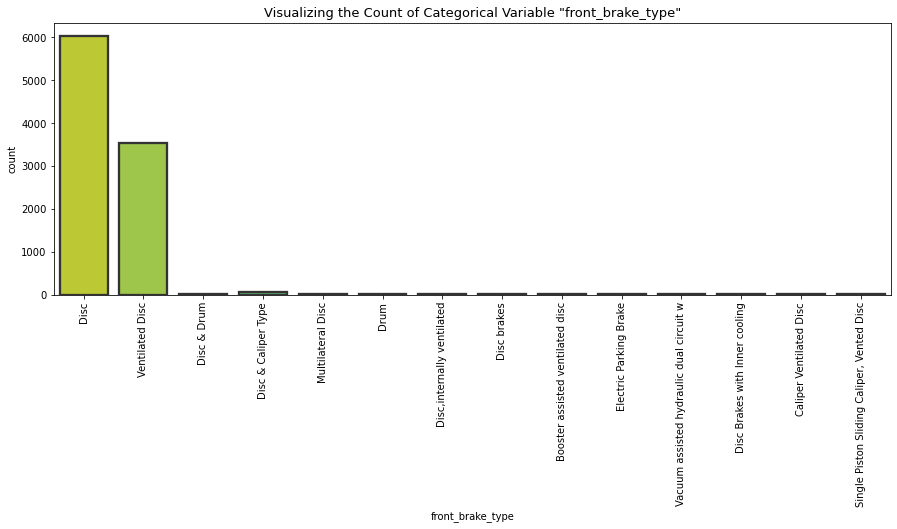

In [66]:
# Visualizinf the counts of front_brake_type of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "front_brake_type"',fontsize=13)
sns.countplot(df['front_brake_type'],palette ="viridis_r", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

## Observations:
- By visualizing the above count plot we can conclude that the cars with Disc and Ventilated Disc type of brake system used for front-side wheels are having high count compared to other brake types.

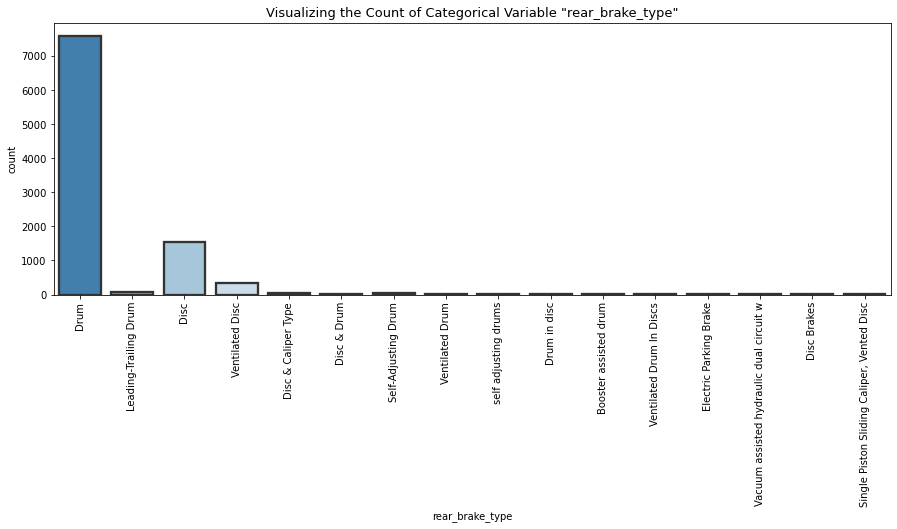

<Figure size 432x288 with 0 Axes>

In [72]:
# Visualizinf the counts of rear_brake_type of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "rear_brake_type"',fontsize=13)
sns.countplot(df['rear_brake_type'],palette ="tab20c", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()
plt.savefig("categ.jpg")

## Observations:
- The above graph represents the count of rear_brake_type of the cars which shows that the cars having Drum type of brake system used for back-side wheels are having high count of around 10000 compared to other type of rear brakes.

Delhi_NCR    1480
Bangalore    1430
Pune         1059
Chennai       938
Mumbai        840
Hyderabad     806
Kolkata       700
Ahmedabad     586
Gurgaon       496
Jaipur        465
Noida         457
New_Delhi     420
Name: Location, dtype: int64


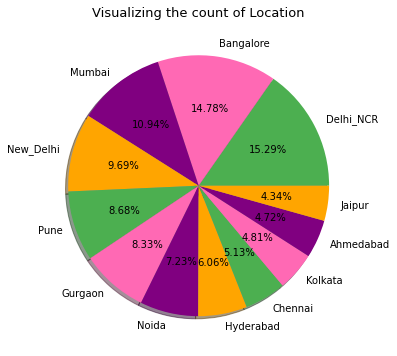

<Figure size 432x288 with 0 Axes>

In [71]:
# Visualizing the count of Location of the car 
print(df["Location"].value_counts())
labels='Delhi_NCR','Bangalore','Mumbai','New_Delhi','Pune','Gurgaon','Noida','Hyderabad','Chennai','Kolkata','Ahmedabad','Jaipur'
colors = ["#4CAF50", "hotpink","purple","orange"]
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Location'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title("Visualizing the count of Location",fontsize=13)
plt.show()

## Observations:
- By looking at the above count plot we can get to know that the cars from the city Delhi_NCR, Bangalore, Mumbai and New_Delhi have high counts which are almost similar. And the other locations also have no much difference in the counts.

## Distribution of skewness
## Plotting Numerical Variables

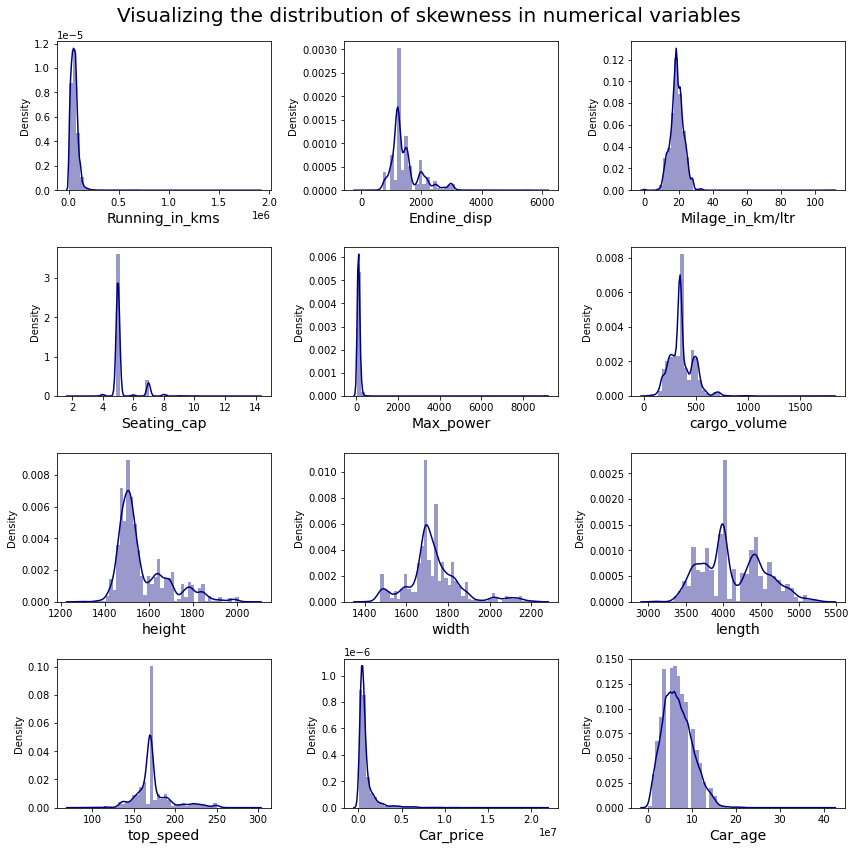

In [70]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color="navy")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()
plt.savefig("dist_plot.jpg")

## Observations:
Above plot shows how the data has been distributed in each of the columns.

- From the distribution plots we can observe most of the columns are not normally distributed, only the columns "Milage_in_km/ltr" looks somewhat normal.
- Also, we can notice the columns like "Running_in_kms", "Engine_disp", "Max_power", "cargo_volume", "Car_age" etc are skewed to right as the mean value in these columns are much greater than the median(50%).
- The data in the column "height" skewed to right since the mean values is less than the median.
- We need to remove this skewness before building our machine learning models.

## Bivariate Analysis
## Visualizing Categorical Variables vs Car_Price

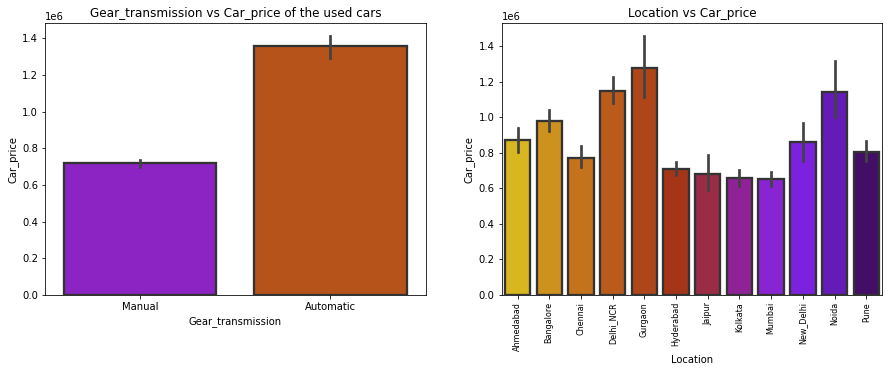

In [77]:
plt.figure(figsize=(15,5))

# Comparing Car_Price and Gear_transmission of the used cars
plt.subplot(1,2,1)
sns.barplot(df['Gear_transmission'],df['Car_price'],palette="gnuplot", linewidth=2.3, edgecolor=".2");
plt.title('Gear_transmission vs Car_price of the used cars')

# Comparing Car_Price and Location of the used cars
plt.subplot(1,2,2)
sns.barplot(df['Location'],df['Car_price'],palette="gnuplot_r", linewidth=2.3, edgecolor=".2");
plt.title('Location vs Car_price')
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

## Observations:
- Car_Price vs Gear_transmission: From the bar plot we can observe that the cars which have Automatic gear transmission system are having high price compared to the cars which have Manual gear transmission system.
- Car_Price vs Location: From the second plot we came to know that the old cars from the city Gurgaon have higher price followed by Noida and Delhi_NCR. And the cars from the cities Jaipur, Mumbai, kolkata etc have very less price.

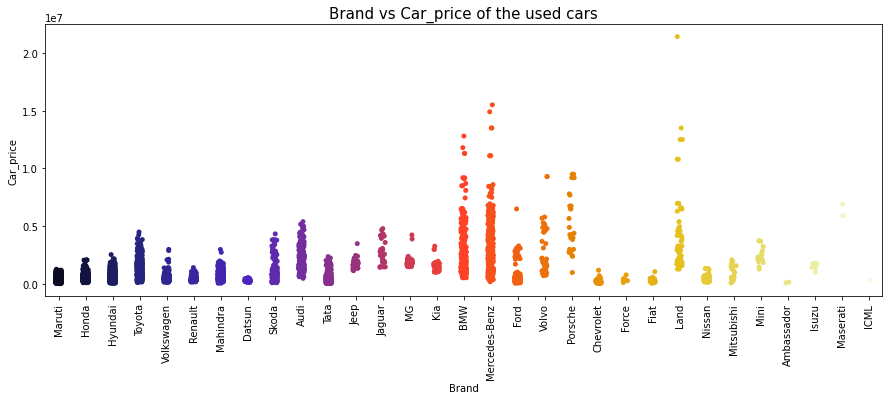

In [78]:
# Comparing Car_Price and Brand of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Brand'],df['Car_price'],palette="CMRmap");
plt.title('Brand vs Car_price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

## Observations:
- Car_Price vs Brand: The above strip plot shows how the used car prices changes depending on Brands. Here the cars from Mercedes_Benz, Land and BMW brand have high price compared to other brands.

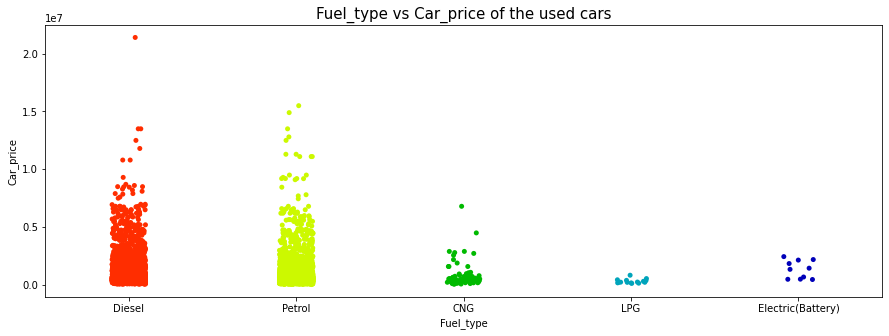

In [79]:
# Comparing Car_Price and Fuel_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Fuel_type'],df['Car_price'],palette="nipy_spectral_r");
plt.title('Fuel_type vs Car_price of the used cars',fontsize=15)
plt.show()

## Observations:
- Car_Price vs Fuel_type: From the graph we can conclude that more number of cars are using Petrol and Diesel fuels and these cars have wide range of price from minimum to maximum. And very few of the cars uses CNG, LPG, and Electricity as fuel type which are not much expensive when compared to that of the diesel and petrol cars.

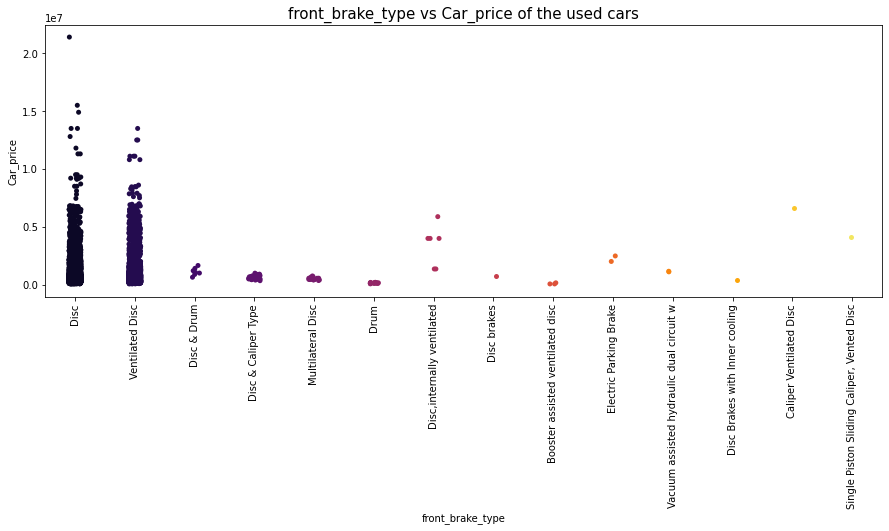

In [80]:
# Comparing Car_Price and front_brake_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['front_brake_type'],df['Car_price'],palette="inferno");
plt.title('front_brake_type vs Car_price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

## Observations:
- Car_Price vs front_brake_type: Looking at the above bar plot for front_brake_type vs Car_Price we can say that the cars with Disc and Ventilated Disc system for front wheels are having higher prices than other type of braking systems.

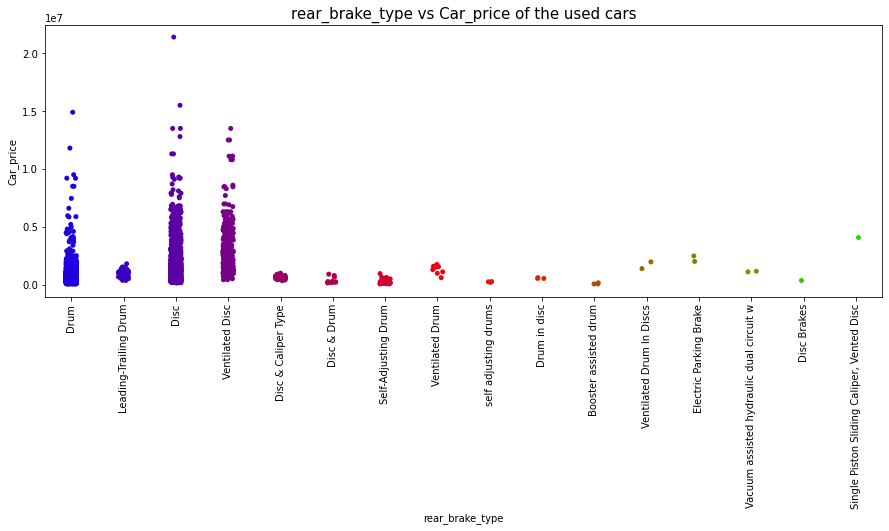

In [81]:
# Comparing Car_Price and rear_brake_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['rear_brake_type'],df['Car_price'],palette="brg");
plt.title('rear_brake_type vs Car_price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

## Observations:
- Car_Price vs rear_brake_type: The above graph is representing a barplot for rear_brake_type vs Car_Price which tells us that the cars having Ventilated Disc, Disc or Drum brake system are having higher prices than the cars with other type of braking system at rear side.

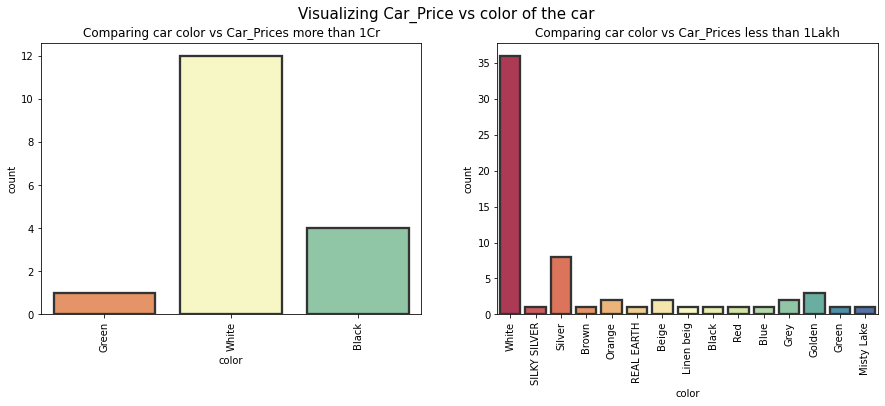

<Figure size 432x288 with 0 Axes>

In [73]:
plt.figure(figsize = (15,5))
plt.suptitle("Visualizing Car_Price vs color of the car",fontsize=15)
plt.subplot(1,2,1)
plt.title("Comparing car color vs Car_Prices more than 1Cr")
sns.countplot(x = 'color', data = df.loc[df['Car_price']>= 10000000], palette='Spectral',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title("Comparing car color vs Car_Prices less than 1Lakh")
sns.countplot(x = 'color', data = df.loc[df['Car_price']<= 100000], palette='Spectral',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.show()
plt.savefig("visual.png")

## Observations:
- **Car_Price vs color:** The first count plot is for the car color vs Car_Prices more than 1 Cr. The plot shows the colors of expensive cars. The white color cars are more expensive compared to the cars with other colors.
- The second graph is for the car color vs car prices below 1 Lakh and it shows the colors of cars which are cheap. From the plot we can say the cars with Silver color and white color have less price.

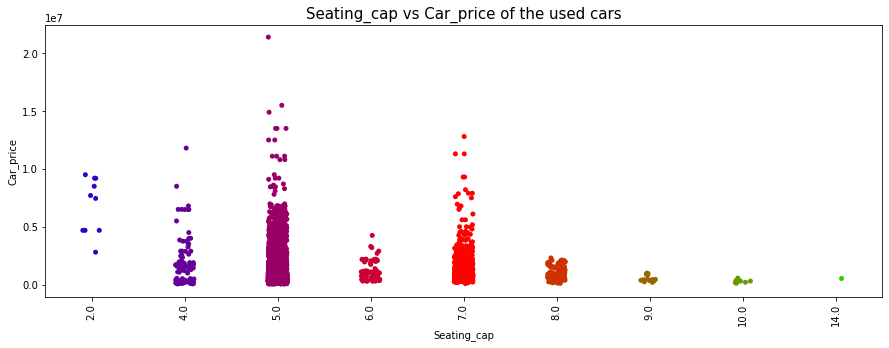

In [84]:
# Comparing Car_Price and Seating_cap of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Seating_cap'],df['Car_price'],palette="brg");
plt.title('Seating_cap vs Car_price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

## Observations:
Car_Price vs Seating_cap: Most of the cars have seating capacity of 5, 7 and 4 and these cars having higher prices than other cars. And only 1 cars are observed with the seating capacity of 14.

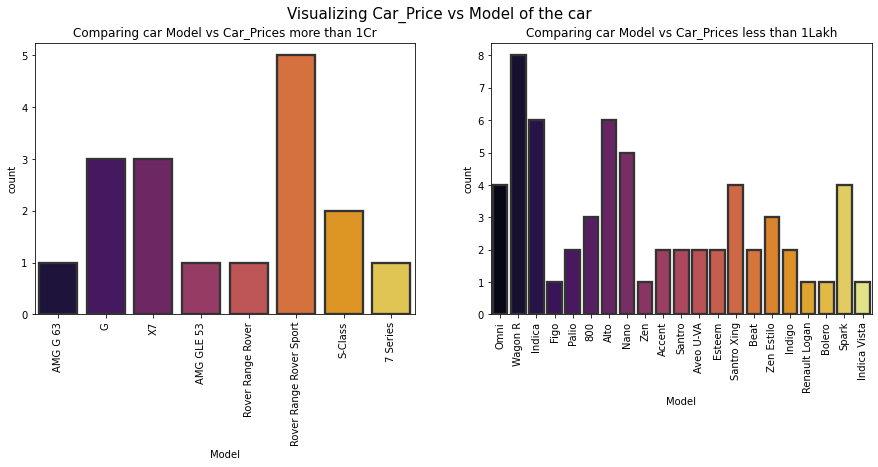

In [85]:
plt.figure(figsize = (15,5))
plt.suptitle("Visualizing Car_Price vs Model of the car",fontsize=15)
plt.subplot(1,2,1)
plt.title("Comparing car Model vs Car_Prices more than 1Cr")
sns.countplot(x = 'Model', data = df.loc[df['Car_price']>= 10000000], palette='inferno',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title("Comparing car Model vs Car_Prices less than 1Lakh")
sns.countplot(x = 'Model', data = df.loc[df['Car_price']<= 100000], palette='inferno',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.show()

## Observations:
- Car_Price vs Model: The first plot is for car model vs car price more than 1Cr. This plot showing the models of expensive cars. The Rover Range Sport model are expensive compared to other models.
- The second plot is for car model vs car price less than 1 Lakh. This plot showing the models which are very cheap. So, from the graph we can say that the car model Figo, Zen, Bolero, Indica Vista and Renault Logan have very less price.

## Visualizing Numerical Variables vs Car_Price

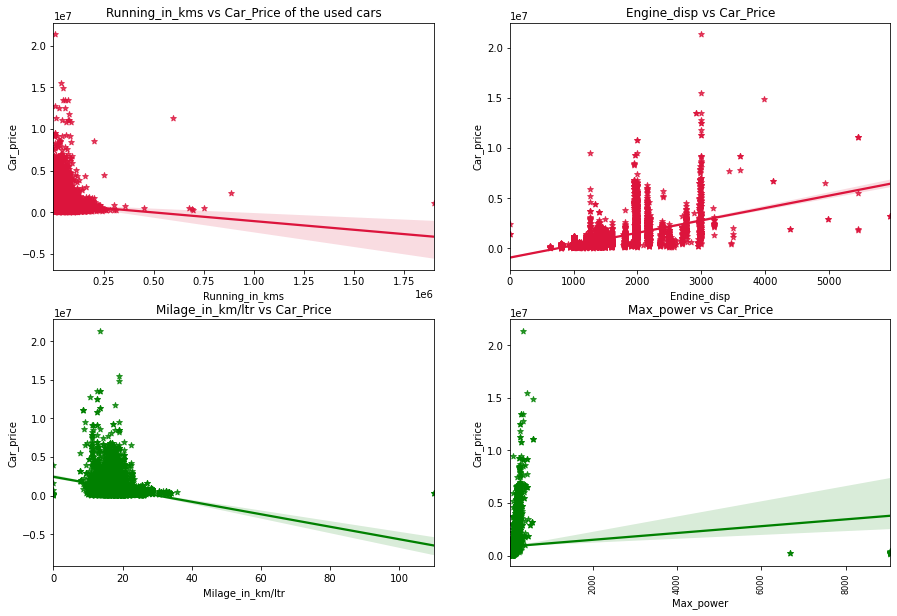

<Figure size 432x288 with 0 Axes>

In [74]:
plt.figure(figsize=(15,10))

# Comparing Car_Price and 'Running_in_kms' of the used cars
plt.subplot(2,2,1)
sns.regplot(x= df['Running_in_kms'],y= df['Car_price'],marker="*",color='crimson')
plt.title('Running_in_kms vs Car_Price of the used cars',fontsize=12)

# Comparing Car_Price and 'Engine_disp' of the used cars
plt.subplot(2,2,2)
sns.regplot(x= df['Endine_disp'],y= df['Car_price'],marker="*",color='crimson')
plt.title('Engine_disp vs Car_Price',fontsize=12)

# Comparing Car_Price and 'Milage_in_km/ltr' of used cars
plt.subplot(2,2,3)
sns.regplot(x= df['Milage_in_km/ltr'],y= df['Car_price'],marker="*",color='g')
plt.title('Milage_in_km/ltr vs Car_Price',fontsize=12)

# Comparing Car_Price vs 'Max_power' of the cars
plt.subplot(2,2,4)
sns.regplot(x= df['Max_power'],y= df['Car_price'],marker="*",color='g')
plt.title('Max_power vs Car_Price',fontsize=12)
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()
plt.savefig("four chart.png")

## Observations:
- Car_Price vs Running_in_kms: From the plot we can say that the prices of cars are higher for the cars which have less running in kms. We can also notice there is negative linear relation between the price and running of cars.
- Car_Price vs Engine_disp: There is a positive correlation between car price and engine displacement. So, we can say as the engine disp or engine cc increases, the price of car also increases.
- Car_Price vs Milage_in_km/ltr: The cars having the milage in the range of 10 to 40 km/ltr are having high sale price. From the graph we can also notice there is negative linear/correlation between the price and milage also some used cars have 0 milage which is unrealistic.
- Car_Price vs Max_power: Looking at the graph we can say there is positive correlation between car price and maximum engine power so, we can say as maximum power engine increases, the car prices also go on increasing.

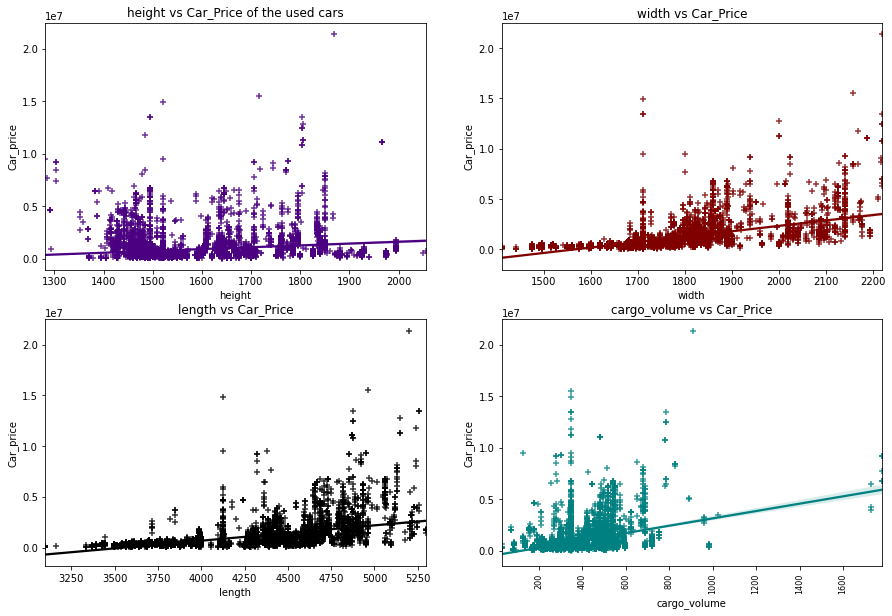

In [87]:
plt.figure(figsize=(15,10))

# Comparing Car_Price and 'height' of the used cars
plt.subplot(2,2,1)
sns.regplot(x= df['height'],y= df['Car_price'],marker="+",color='indigo')
plt.title('height vs Car_Price of the used cars',fontsize=12)

# Comparing Car_Price and 'width' of the used cars
plt.subplot(2,2,2)
sns.regplot(x= df['width'],y= df['Car_price'],marker="+",color='maroon')
plt.title('width vs Car_Price',fontsize=12)

# Comparing Car_Price and 'length' of used cars
plt.subplot(2,2,3)
sns.regplot(x= df['length'],y= df['Car_price'],marker="+",color='k')
plt.title('length vs Car_Price',fontsize=12)

# Comparing Car_Price vs 'Weight' of the cars
plt.subplot(2,2,4)
sns.regplot(x= df['cargo_volume'],y= df['Car_price'],marker="+",color='teal')
plt.title('cargo_volume vs Car_Price',fontsize=12)
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

## Observations:
- Car_Price vs height: From the graph it is clear that the car price is not strongly related with the height of the car, we can say the cars having height in the range of 1300 mm to 1800 mm have somewhat high price.
- Car_Price vs width: The graph shows there is some positive linear relation between car price and width of the car, so the cars having width in the range of 1700mm to 2200mm have high price. So we can conclude as the width of the car increases, the price of the car also goes on increasing.
- Car_Price vs length: There is some positive linear relation between car price and length of the cars. As the length of the cars increases, the price of the cars also increases. The cars that are having the length above 4250mm to 4500mm have high price.
- Car_Price vs cargo_volume: There is some positive linear relation between price of the car and cargo volume.

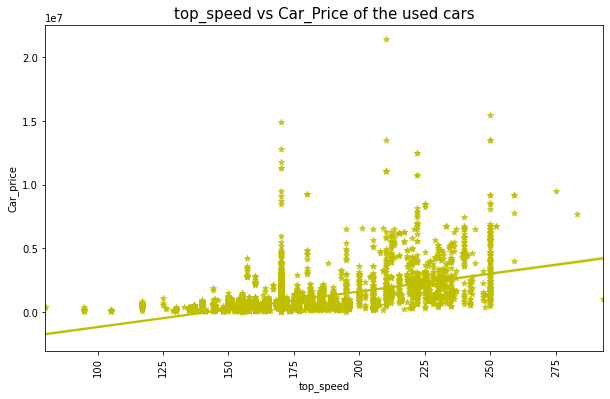

In [88]:
# Comparing Car_Price and 'top_speed' of the used cars
plt.figure(figsize=(10,6))
sns.regplot(x= df['top_speed'],y= df['Car_price'],marker="*",color='y')
plt.title('top_speed vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

## Observations:
- Car_Price vs top_speed: From the graph we can notice there is positive linear relation between car price and maximum speed limit of the car. The cars having top speed in the range of 120 km/hr to 250 km/hr having higher price and there are very less number of cars which have top speed below 100km/hr. So, we can conclude that as the maximum speed limit of the car (top_speed) increases, the car price also increases.

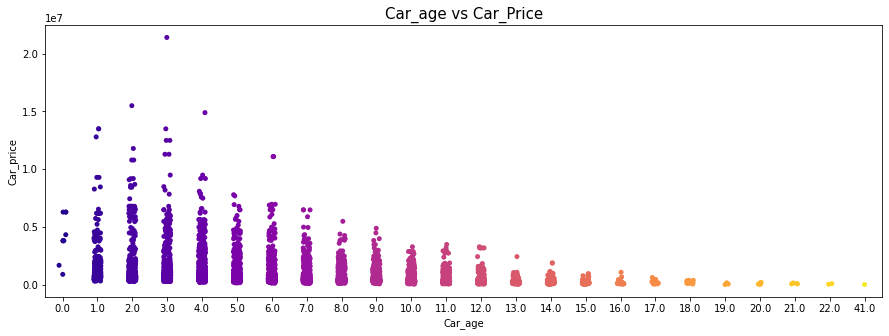

In [90]:
# Comparing Car_Price and 'Car_age' of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Car_age'],df['Car_price'],palette="plasma")
plt.title('Car_age vs Car_Price',fontsize=15)
plt.show()

## Observations:
- Car_Price vs Car_age: From the above strip plot we can say that the older cars are having very lower prices when compared to the new cars that is the cars having very less age. So, there is negative relation between car price and age of the cars and we can conclude as the age decreases, the car prices increases.

#### Till now we have checked the relation between the independent variables and dependent variable that is our target column "Car_Price". Now let's check the relation between two independent variables and comppare each of them with others.

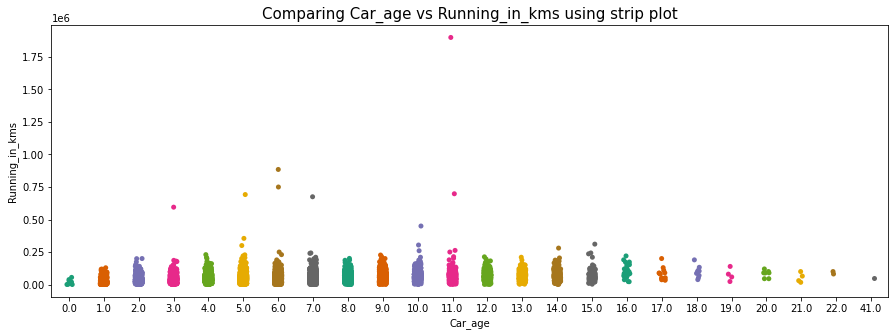

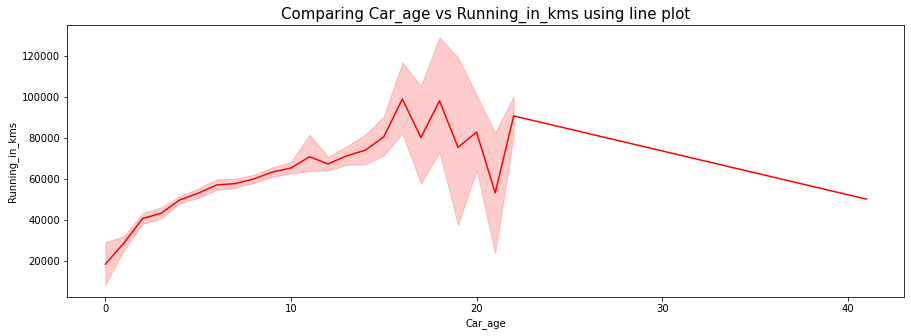

In [91]:
# Checking the relation between car age and running in kms
plt.figure(figsize = (15,5))
sns.stripplot(x = 'Car_age', y = 'Running_in_kms', data = df, palette = "Dark2")
plt.title("Comparing Car_age vs Running_in_kms using strip plot",fontsize=15)

plt.figure(figsize = (15,5))
sns.lineplot(x = 'Car_age', y = 'Running_in_kms', data = df, color = "r")
plt.title("Comparing Car_age vs Running_in_kms using line plot",fontsize=15)
plt.show()
plt.show()

## Observations:
- Car_age vs Running_in_kms: The above two graphs represents car_age vs Running in kms. The cars which have their age from 2 years to 16 years have highly used. That is the running kms for these cars are around 1 lakh kms.

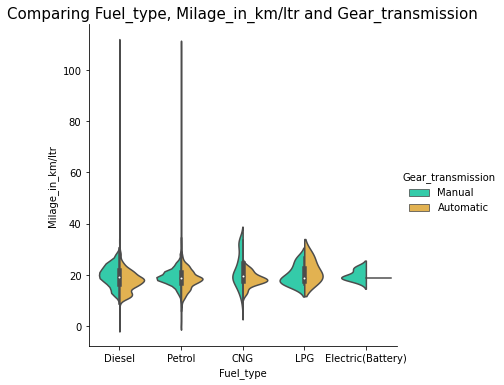

In [92]:
# Lets check the relation between fuel_type, Gear_transmission and Mileage of the cars
sns.catplot(x="Fuel_type", y="Milage_in_km/ltr", hue="Gear_transmission", kind="violin", split=True, palette="turbo", data=df)
plt.title("Comparing Fuel_type, Milage_in_km/ltr and Gear_transmission",fontsize=15)
plt.show()

## Observations:
- The above violin plot gives the relation between Milage in km/ltr and Fuel type on the basis of gear transmission. As we can observe the cars with Manual gear transmission which are using CNG as a fuel are having good milage compared to other fuel types.

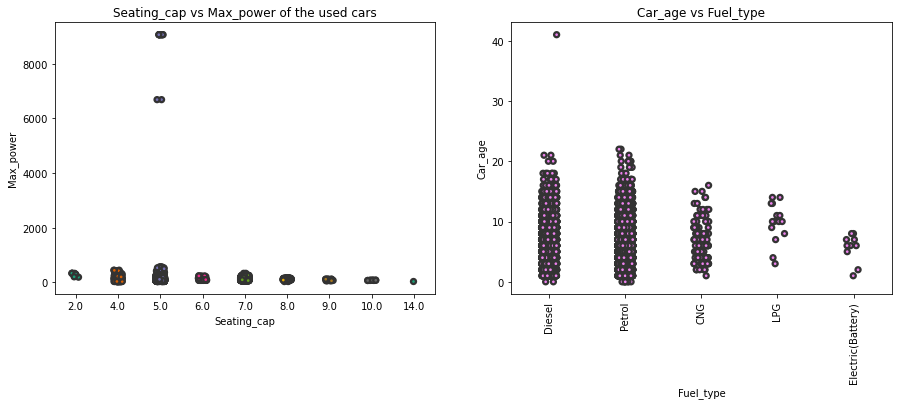

In [93]:
plt.figure(figsize=(15,5))

# Comparing Seating_cap and 'Max_power' of the used cars
plt.subplot(1,2,1)
sns.stripplot(x= df['Seating_cap'],y= df['Max_power'],palette = "Dark2",linewidth=2.3, edgecolor=".2")
plt.title('Seating_cap vs Max_power of the used cars',fontsize=12)

# Comparing Car_age and 'Fuel_type' of the used cars
plt.subplot(1,2,2)
sns.stripplot(x= df['Fuel_type'],y= df['Car_age'],linewidth=2.3, edgecolor=".2",color="violet")
plt.title('Car_age vs Fuel_type',fontsize=12)

plt.xticks(rotation=90)
plt.show()

## Observations:
- Seating_cap vs Max_power: The cars with seating capacity 5 have high maximum power of engine used in cars and the cars with 10 seating capacity have very less maximum engine power.
- Fuel_type vs Car_age: The cars which are using Petrol and Diesel as fuel they have high age and the cars with low age are using electricity as the fuel.

## Multivariate Analysis

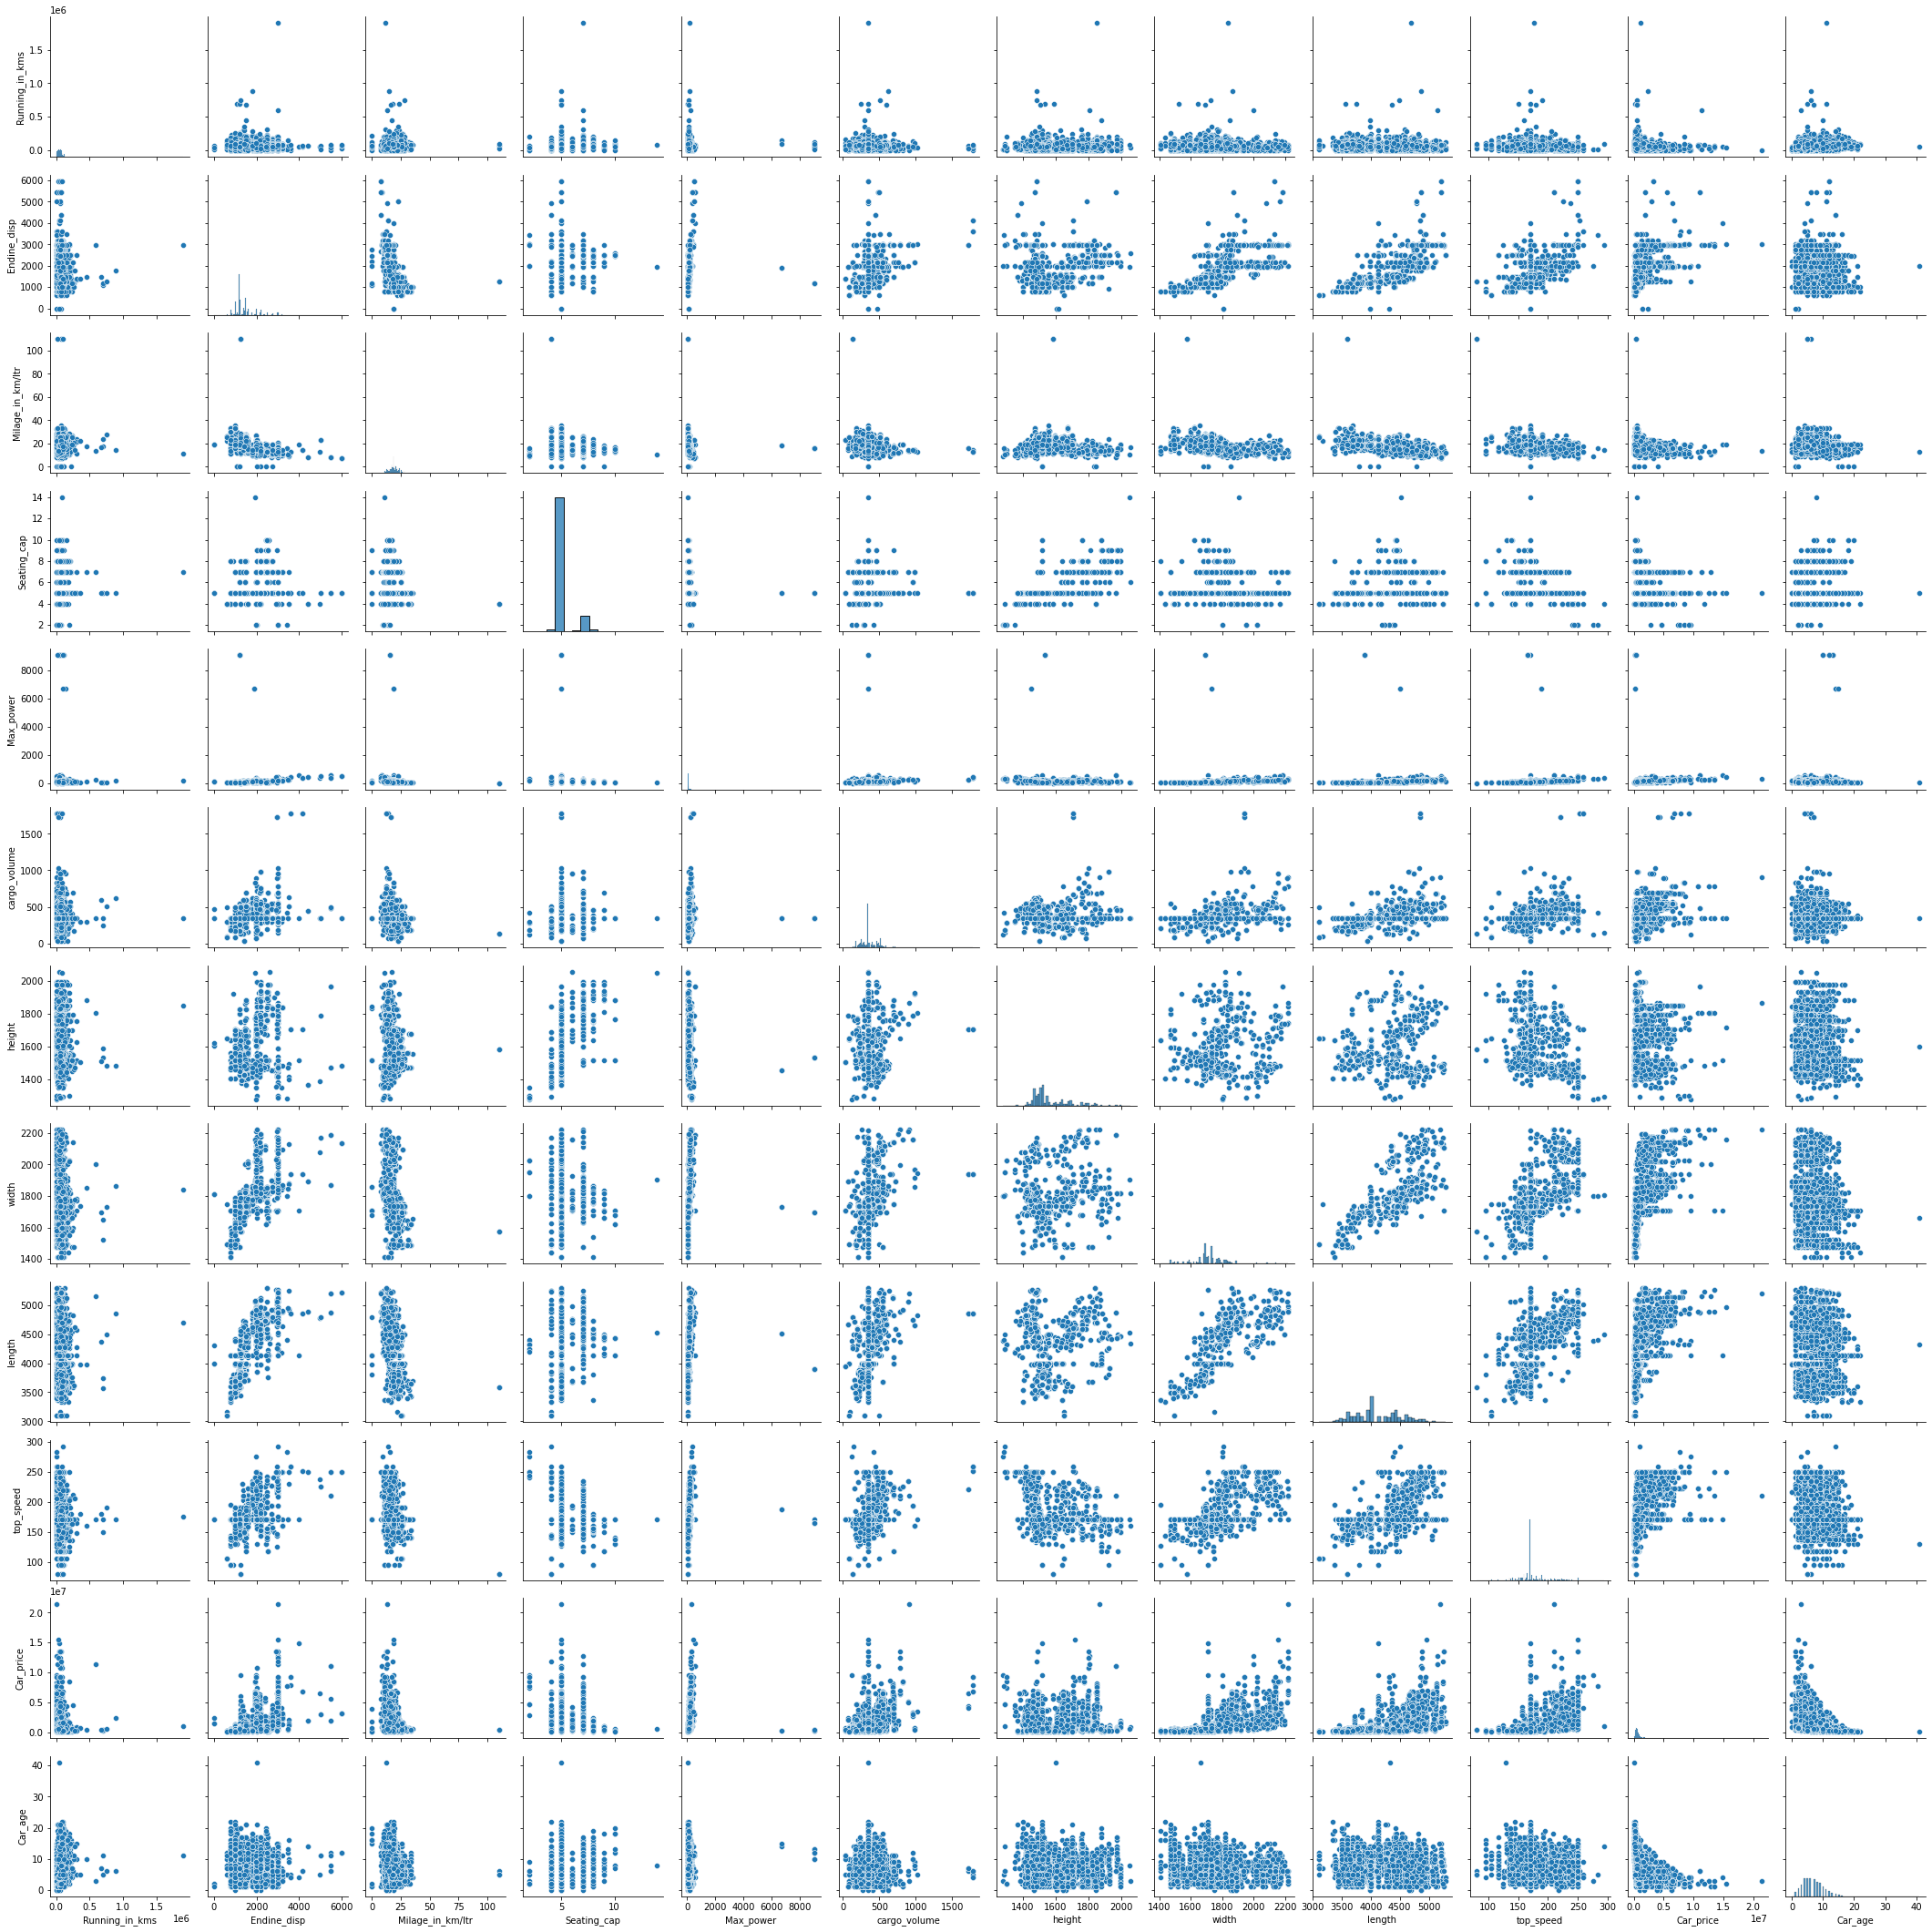

In [97]:
sns.pairplot(df,palette='husl')
plt.show()

- The pairplot gives the pairwise relation between the features on the basis of the target "Car_Price". On the diagonal we can notice the distribution plots.
- From the pair plot we can observe some of the features have strong correlation with each other and some of them have weak correlation with each other.
- We can also find some outliers present in the data, we will remove them using appropriate methods.

## Identifying the outliers in the dataset using boxplots

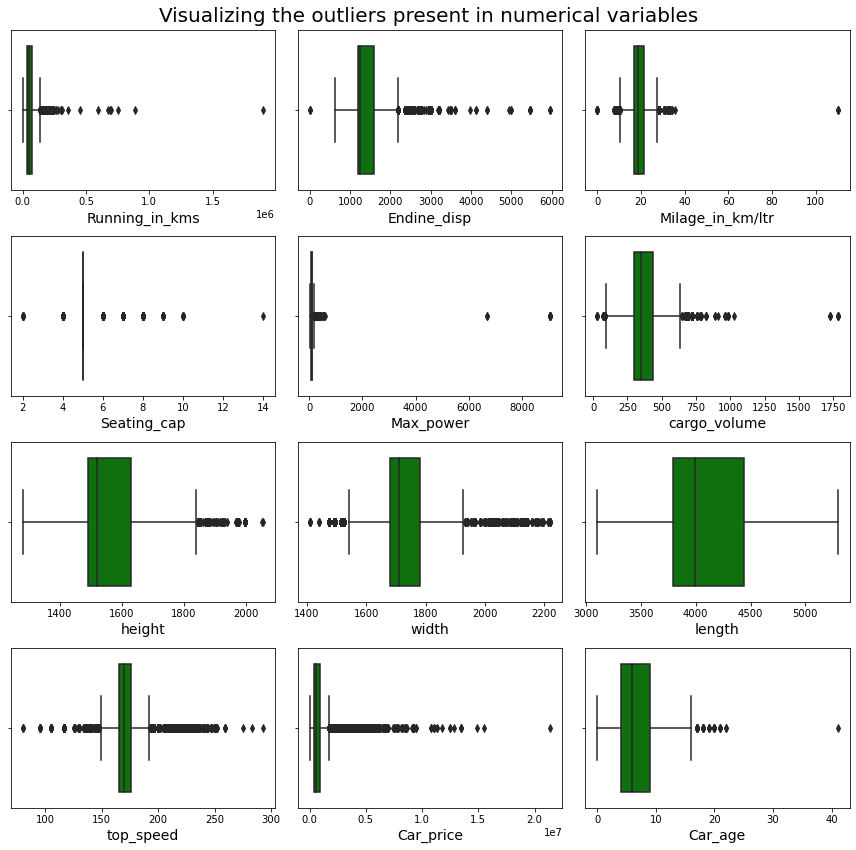

In [75]:
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the outliers present in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="g")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()
plt.savefig("visualize.jpg")

- From the above box plots we can observe all the columns contains the outliers except "length".
- Also the column Car_Price is our target variable, so no need to remove outliers in these two columns. Let's remove the outliers in the remaining columns.

## Removing outliers from dataset
## i) Zscore method

In [77]:
# Features containing outliers
features = df[['Running_in_kms','Endine_disp','Milage_in_km/ltr','Seating_cap','Max_power','height','width','cargo_volume','top_speed','Car_age']]

# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))

I have listed down the numerical features having outliers and using zscore method to get rid off the outliers in these columns.

In [78]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df.head()

Model   Brand Fuel_type  Running_in_kms  Endine_disp  \
0  Swift Dzire  Maruti    Diesel         55435.0       1248.0   
1  Swift Dzire  Maruti    Petrol          9386.0       1197.0   
2  Swift Dzire  Maruti    Petrol         11980.0       1197.0   
3         City   Honda    Petrol         89294.0       1497.0   
4       Baleno  Maruti    Petrol         37977.0       1197.0   

  Gear_transmission  Milage_in_km/ltr  Seating_cap              color  \
0            Manual             28.40          5.0               Grey   
1            Manual             22.00          5.0              White   
2            Manual             21.21          5.0               Grey   
3            Manual             17.40          5.0       Golden brown   
4         Automatic             21.40          5.0  Pearl Phoenix Red   

   Max_power front_brake_type rear_brake_type  cargo_volume  height   width  \
0      74.02             Disc            Drum         378.0  1515.0  1735.0   
1      81.80  Ventilated Disc            Drum         378.0  1515.0  1735.0   
2      81.80             Disc            Drum         378.0  1515.0  1735.0   
3     117.60  Ventilated Disc            Drum         510.0  1495.0  1695.0   
4      83.10             Disc            Drum         339.0  1510.0  1745.0   

   length  top_speed  Car_price   Location  Car_age  
0  3995.0      170.0   745000.0  Ahmedabad      4.0  
1  3995.0      170.0   650000.0  Ahmedabad      3.0  
2  3995.0      170.0   641000.0  Ahmedabad      3.0  
3  4440.0      189.0   765000.0  Ahmedabad      4.0  
4  3995.0      180.0   595000.0  Ahmedabad      6.0

This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [79]:
# Checking the shape of dataset before and after removing outliers
print("Shape of dataset before removing outliers:", df.shape)
print("Shape of dataset after removing outliers:", new_df.shape)

Shape of dataset before removing outliers: (9677, 20)
Shape of dataset after removing outliers: (8933, 20)


In [80]:
# Checking the data loss after removing outliers
data_loss = (9677-8933)/9677*100
data_loss

7.688333161103649

By using Zscore I am losing around 7.6% of data which is acceptable as the acceptable range of data loss is less than 10. Let's try to remove outliers using IQR method and check the data loss.

## ii) IQR (InterQuartile Range) method

In [81]:
# Removing outliers using IQR method
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness of dataset using IQR method.

In [82]:
print("Shape of data after using IQR method:", df1.shape)

Shape of data after using IQR method: (5783, 20)


In [83]:
# Checking the the data loss after removing outliers
data_loss = (9677-5783)/9677*100
data_loss

40.23974372222796

Using IQR method the data loss is 40.23%. So, considering Zscore method.

## Checking for skewness in the data

In [84]:
# Checking the skewness
new_df.skew()

Running_in_kms      0.657563
Endine_disp         1.469338
Milage_in_km/ltr    0.095624
Seating_cap         2.676349
Max_power           1.319072
cargo_volume        0.479119
height              1.285817
width               0.466999
length              0.323534
top_speed           1.074611
Car_price           3.996237
Car_age             0.406000
dtype: float64

We can find the skewness in all the columns except "Milage_in_km/ltr", "width", "cargo_volume", "length", and "Car_age". Let's remove skewness in the remaining columns.

## Removing skewness using yeo-johnson method

In [85]:
# Removing skewness using yeo-johnson  method to get better prediction
skew1 = ["Running_in_kms","Endine_disp","Seating_cap","Max_power","height","top_speed"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

Using power transformation method to remove the skewness in the data.

In [86]:
new_df[skew1] = scaler.fit_transform(new_df[skew1].values)
new_df[skew1].head()

Running_in_kms  Endine_disp  Seating_cap  Max_power    height  top_speed
0        0.164649    -0.328448    -0.213808  -0.709556 -0.352582  -0.011829
1       -1.727534    -0.470924    -0.213808  -0.364973 -0.352582  -0.011829
2       -1.565316    -0.470924    -0.213808  -0.364973 -0.352582  -0.011829
3        1.086155     0.310917    -0.213808   0.739872 -0.654795   0.935270
4       -0.409479    -0.470924    -0.213808  -0.312298 -0.402951   0.511537

In [87]:
# Checking skewness after using yeo-johnson method
new_df[skew1].skew()

Running_in_kms   -0.067592
Endine_disp       0.292955
Seating_cap      -1.319887
Max_power         0.005642
height            0.646408
top_speed        -0.063822
dtype: float64

We can observe the skewness has almost been removed in all the columns but in "Seating_cap" and "height". In these column the skewness has been reduced bit, it seems that the data in this column may be important so keeping it as it is.

## Encoding the categorical columns using Label Encoder Method

In [88]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

Encoded the categorical columns using label encoder.

In [89]:
# Displaying the categorical columns after encoding 
new_df[categorical_col].head()

Model  Brand  Fuel_type  Gear_transmission  color  front_brake_type  \
0    191     16          1                  1    135                 1   
1    191     16          4                  1    363                 8   
2    191     16          4                  1    135                 1   
3     57      7          4                  1    129                 8   
4     34     16          4                  0    248                 1   

   rear_brake_type  Location  
0                5         0  
1                5         0  
2                5         0  
3                5         0  
4                5         0

The categorical columns(object datatype) have been converted into numerical columns by using label encoding.

## Correlation between the label and features using HEAT map

In [90]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

Model     Brand  Fuel_type  Running_in_kms  Endine_disp  \
Model              1.000000  0.101462  -0.005281        0.010349    -0.056051   
Brand              0.101462  1.000000  -0.040607        0.018330     0.038846   
Fuel_type         -0.005281 -0.040607   1.000000       -0.362722    -0.246720   
Running_in_kms     0.010349  0.018330  -0.362722        1.000000     0.108278   
Endine_disp       -0.056051  0.038846  -0.246720        0.108278     1.000000   
Gear_transmission  0.065396  0.006741   0.030762        0.047195    -0.186248   
Milage_in_km/ltr   0.046362  0.006469  -0.074353       -0.014428    -0.549925   
Seating_cap        0.016856  0.147130  -0.148504        0.101222     0.310403   
color              0.041693 -0.013986  -0.023360        0.041842     0.014480   
Max_power         -0.037846 -0.087931  -0.161696        0.014372     0.837251   
front_brake_type   0.002434  0.053202  -0.055981        0.090460     0.093318   
rear_brake_type   -0.060109 -0.022591   0.033205        0.036928    -0.254018   
cargo_volume      -0.065896 -0.042819  -0.112197        0.028544     0.481792   
height             0.229412  0.137959  -0.141814        0.018793     0.278472   
width              0.003500 -0.040390  -0.222442        0.016074     0.726547   
length            -0.119708  0.045901  -0.208355        0.055390     0.820479   
top_speed         -0.019725 -0.145280  -0.110149        0.003334     0.536878   
Car_price         -0.102451 -0.003946  -0.140461       -0.143958     0.529734   
Location           0.013937  0.007070   0.020017       -0.036358    -0.061048   
Car_age            0.043114 -0.082627  -0.027506        0.289205     0.054223   

                   Gear_transmission  Milage_in_km/ltr  Seating_cap     color  \
Model                       0.065396          0.046362     0.016856  0.041693   
Brand                       0.006741          0.006469     0.147130 -0.013986   
Fuel_type                   0.030762         -0.074353    -0.148504 -0.023360   
Running_in_kms              0.047195         -0.014428     0.101222  0.041842   
Endine_disp                -0.186248         -0.549925     0.310403  0.014480   
Gear_transmission           1.000000          0.162099     0.001597  0.016543   
Milage_in_km/ltr            0.162099          1.000000    -0.221067 -0.018465   
Seating_cap                 0.001597         -0.221067     1.000000  0.049022   
color                       0.016543         -0.018465     0.049022  1.000000   
Max_power                  -0.225176         -0.543445     0.159058 -0.028250   
front_brake_type           -0.002906          0.001955     0.050912  0.000447   
rear_brake_type             0.103591          0.184491    -0.005268 -0.015999   
cargo_volume               -0.117666         -0.276705     0.005181 -0.009594   
height                     -0.009649         -0.208813     0.450261  0.011746   
width                      -0.185210         -0.371817     0.178231 -0.020113   
length                     -0.184720         -0.475681     0.282045 -0.013718   
top_speed                  -0.195618         -0.270490    -0.079865 -0.045840   
Car_price                  -0.255673         -0.304611     0.081667 -0.024893   
Location                    0.017627          0.043909    -0.042231 -0.027609   
Car_age                     0.064140         -0.159548    -0.019894  0.028774   

                   Max_power  front_brake_type  rear_brake_type  cargo_volume  \
Model              -0.037846          0.002434        -0.060109     -0.065896   
Brand              -0.087931          0.053202        -0.022591     -0.042819   
Fuel_type          -0.161696         -0.055981         0.033205     -0.112197   
Running_in_kms      0.014372          0.090460         0.036928      0.028544   
Endine_disp         0.837251          0.093318        -0.254018      0.481792   
Gear_transmission  -0.225176         -0.002906         0.103591     -0.117666   
Milage_in_km/ltr   -0.543445          0.001955     

The above method gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

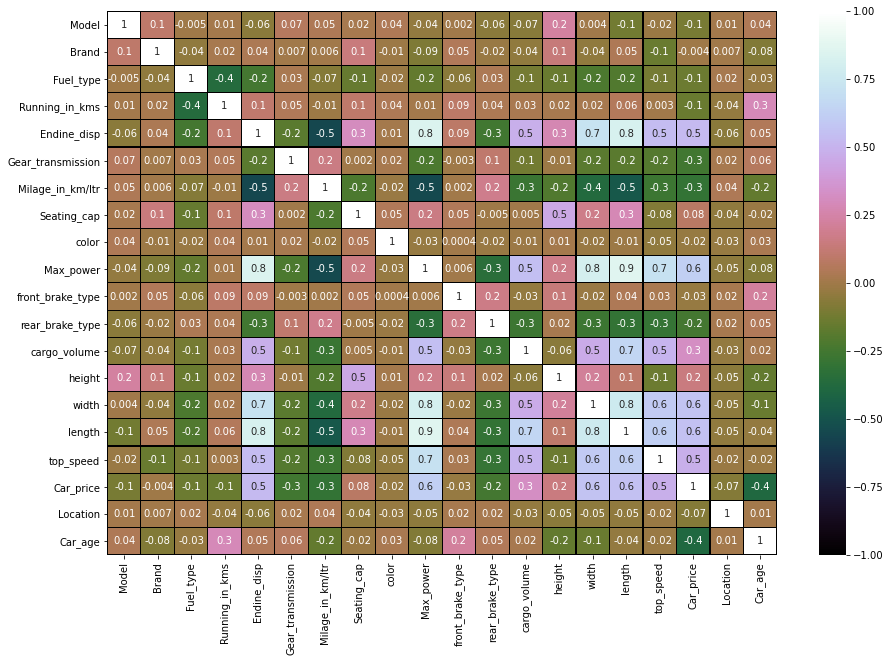

In [91]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="cubehelix")
plt.yticks(rotation=0);
plt.savefig("correlation.jpg")

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature to other.

This heat map contains both positive and negative correlation.

- From the heat map we can notice that the dark shades are highly positively correlated and light shades are highly negatively correlated with the target variable.
- The columns "Max_power", "width", "length", "Engine_disp", "top_speed" and "cargo_volume" have strong positive relation with the target variable "Car_Price".
- The other columns like "Gear_transmission", "Car_age", "rear_brake_type", "Fuel_type", "Milage_in_km" etc are highly negatively correlated with the target variable "Car_Price".
- We can observe from the map that most of the columns are highly correlated with each other which leads to multicollinearity problem.So, we will check the VIF value and remove the columns having high VIF value to overcome with this multicollinearity problem.

In [119]:
# Checking the positive and negative relation between label and features 
cor['Car_price'].sort_values(ascending=False)

Car_price            1.000000
Max_power            0.617574
width                0.567307
length               0.562001
Endine_disp          0.529734
top_speed            0.480586
cargo_volume         0.321351
height               0.154753
Seating_cap          0.081667
Brand               -0.003946
color               -0.024893
front_brake_type    -0.026184
Location            -0.071135
Model               -0.102451
Fuel_type           -0.140461
Running_in_kms      -0.143958
rear_brake_type     -0.248745
Gear_transmission   -0.255673
Milage_in_km/ltr    -0.304611
Car_age             -0.383350
Name: Car_price, dtype: float64

Here we can observe the positive and negative correlation between features and label in the descending order.

## Visualizing the correlation between label and features using bar plot

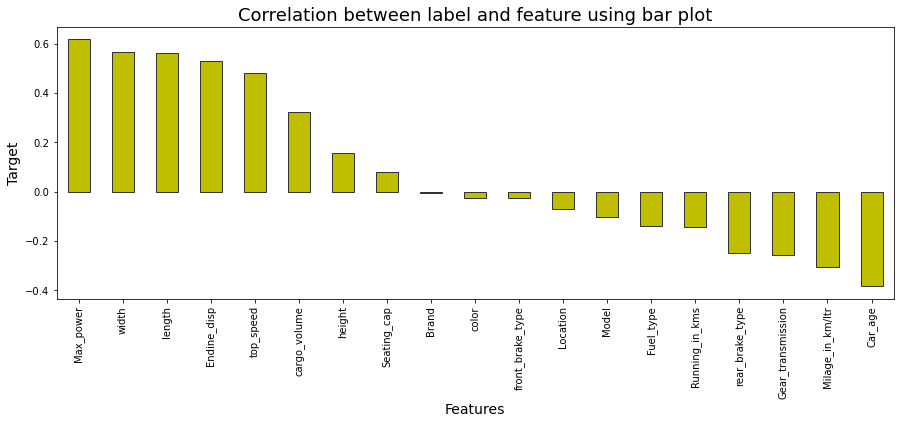

In [121]:
plt.figure(figsize=(15,5))
new_df.corr()['Car_price'].sort_values(ascending=False).drop(['Car_price']).plot(kind='bar',color='y',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the bar plot we can clearly observe the positive and negative correlation between the label and features. Here the column "color"  and "Brand" is less correlated with the label compared to others, we can drop this columns if necessary but for now let's keep it as it is.

## Separating the feature and label into x and y

In [122]:
x = new_df.drop("Car_price", axis=1)
y = new_df["Car_price"]

We have separated both dependent and independent variables.

In [123]:
# Dimension of x and y
x.shape, y.shape

((8933, 19), (8933,))

## Feature Scaling Using StandardScaler

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

Model     Brand  Fuel_type  Running_in_kms  Endine_disp  \
0  0.846096  0.390857  -1.198132        0.164649    -0.328448   
1  0.846096  0.390857   0.822175       -1.727534    -0.470924   
2  0.846096  0.390857   0.822175       -1.565316    -0.470924   
3 -0.942250 -0.918684   0.822175        1.086155     0.310917   
4 -1.249205  0.390857   0.822175       -0.409479    -0.470924   

   Gear_transmission  Milage_in_km/ltr  Seating_cap    color  Max_power  \
0           0.595581          2.523110    -0.213808 -0.91536  -0.709556   
1           0.595581          0.717431    -0.213808  0.98733  -0.364973   
2           0.595581          0.494542    -0.213808 -0.91536  -0.364973   
3           0.595581         -0.580401    -0.213808 -0.96543   0.739872   
4          -1.679033          0.548148    -0.213808  0.02764  -0.312298   

   front_brake_type  rear_brake_type  cargo_volume    height     width  \
0         -0.761033         0.267653      0.201871 -0.347540  0.155411   
1          1.320689         0.267653      0.201871 -0.347540  0.155411   
2         -0.761033         0.267653      0.201871 -0.347540  0.155411   
3          1.320689         0.267653      1.422897 -0.649757 -0.202090   
4         -0.761033         0.267653     -0.158886 -0.397910  0.244786   

     length  top_speed  Location   Car_age  
0 -0.264294  -0.011829 -1.417448 -0.849332  
1 -0.264294  -0.011829 -1.417448 -1.164045  
2 -0.264294  -0.011829 -1.417448 -1.164045  
3  0.893603   0.935270 -1.417448 -0.849332  
4 -0.264294   0.511537 -1.417448 -0.219908

We have scaled the data using StandardScaler method to overcome with the issue of data biasness and displayed the data of independent variables after scaling.

As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns in order to overcome with the multicollinearity issue.

## Checking Variance Inflation Factor (VIF)

In [125]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values           Features
0     1.172354              Model
1     1.176880              Brand
2     1.334004          Fuel_type
3     1.279178     Running_in_kms
4     5.020106        Endine_disp
5     1.074531  Gear_transmission
6     1.812279   Milage_in_km/ltr
7     1.604218        Seating_cap
8     1.015192              color
9     8.748820          Max_power
10    1.175818   front_brake_type
11    1.208670    rear_brake_type
12    1.981989       cargo_volume
13    1.866129             height
14    3.415268              width
15    7.451274             length
16    2.633907          top_speed
17    1.009588           Location
18    1.439127            Car_age

There is no multicollinearity issue as the VIF values are less than 10 in all the columns.

I have successfully completed preprocessing and data cleaning in the dataset. Now it is time to build my machine learning models.

## Building Machine Learning Models
## Finding the Best Random State and Accuracy

In [126]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9557754946576589  on Random_state  53


Great!!! so with the help of random state selection process we have found our random state to be 53 amongst 1-1000 with best accuracy as 95.57% using Random Forest Regressor.

## Feature Importance

In [127]:
# Lets chkeck the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

Importance
Features                     
Max_power               0.588
Car_age                 0.199
Running_in_kms          0.030
width                   0.028
length                  0.025
top_speed               0.022
Brand                   0.019
Model                   0.016
Endine_disp             0.016
cargo_volume            0.013
height                  0.011
Milage_in_km/ltr        0.010
Location                0.009
color                   0.004
rear_brake_type         0.004
Fuel_type               0.002
Gear_transmission       0.002
Seating_cap             0.001
front_brake_type        0.001

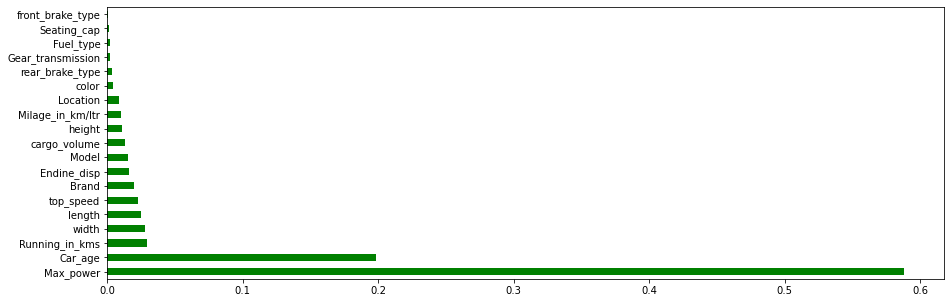

In [128]:
plt.figure(figsize=(15,5))
importances=pd.Series(RFR.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="g")
plt.show()

Here with the help of RandomForestClassifier we are able to list down the importance given to a column as per it's involvement in predicting our label. Here the column "Max_power"contributing more for prediction which means this feature is important for the predictions

## Creating new train test split

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=53)

I am taking 30 percent of the complete dataset for training purpose and the remaining 70 percent will be used to train the machine learning models using the random state.

## ML Regression Algorithms with Evaluation Metrics

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Decision Tree Regressor

The R2_Score is: 84.07497247827516
The Mean Absolute Error is: 124657.54141791044
The Mean Squared Error is: 95988462270.38843
The Root Mean Squared Error is: 309820.0482060327

The Cross Validation Score is: 76.44115311979647

The R2 Score - Cross Validation Score is: 7.633819358478689


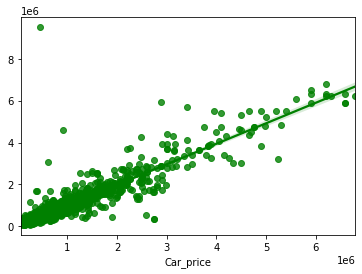

In [131]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
R2_score = r2_score(y_test,predDTR)*100    
print('The R2_Score is:',R2_score) 
# Evaluation Metrics
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predDTR))    
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predDTR))     
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Cross Validation Score
cv_score = (cross_val_score(DTR, x, y, cv=5).mean())*100
print("\nThe Cross Validation Score is:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nThe R2 Score - Cross Validation Score is:", Difference)
# Visualizing the predicted values
sns.regplot(y_test,predDTR,color="g")
plt.show()

- Created Decision Tree Regressor model and checked for its evaluation metrics. The model is giving R2 score as 84.07%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.

## Random Forest Regressor

The R2_Score is: 95.40103306165369
The Mean Absolute Error is: 88779.68708724236
The Mean Squared Error is: 27720376862.268982
The Root Mean Squared Error is: 166494.37486674733

The Cross Validation Score is: 90.61386724105431

The R2 Score - Cross Validation Score is: 4.787165820599384


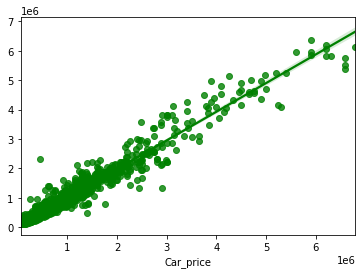

In [133]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
R2_score = r2_score(y_test,predRFR)*100      # R squared score
print('The R2_Score is:',R2_score) 
# Evaluation Metrics
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predRFR))    
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predRFR))     
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predRFR))) 

# Cross Validation Score
cv_score = (cross_val_score(RFR, x, y, cv=5).mean())*100
print("\nThe Cross Validation Score is:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nThe R2 Score - Cross Validation Score is:", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="g")
plt.show()

- Created Random Forest Regressor model and checked for it's evaluation metrics. The model is giving R2 score as 95.40%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.

## Extra Trees Regressor

The R2_Score is: 95.60299092173345
The Mean Absolute Error is: 87317.74540298508
The Mean Squared Error is: 26503071309.35689
The Root Mean Squared Error is: 162797.6391393834

The Cross Validation Score is: 91.31860823784679

The R2 Score - Cross Validation Score is: 4.284382683886662


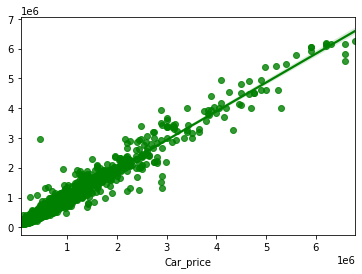

In [134]:
# Checking R2 score for Extra Trees Regressor
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
R2_score = r2_score(y_test,predXT)*100      # R squared score
print('The R2_Score is:',R2_score) 
# Evaluation Metrics
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predXT))    
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predXT))     
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predXT))) 

# Cross Validation Score
cv_score = (cross_val_score(XT, x, y, cv=5).mean())*100
print("\nThe Cross Validation Score is:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nThe R2 Score - Cross Validation Score is:", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="g")
plt.show()

- Created Extra Trees Regressor model and checked for its evaluation metrics. The model is giving R2 score as 95.60%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.

## Gradient Boosting Regressor

The R2_Score is: 93.85184964408738
The Mean Absolute Error is: 107712.27546149981
The Mean Squared Error is: 37058114823.73339
The Root Mean Squared Error is: 192504.8436370716

The Cross Validation Score is: 89.50745309872353

The R2 Score - Cross Validation Score is: 4.34439654536385


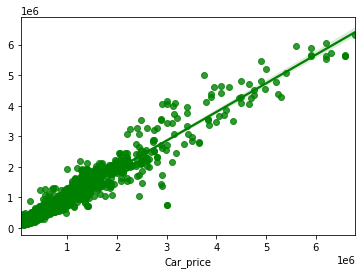

In [135]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
R2_score = r2_score(y_test,predGB)*100      # R squared score
print('The R2_Score is:',R2_score) 
# Evaluation Metrics
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predGB))    
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predGB))     
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predGB))) 

# Cross Validation Score
cv_score = (cross_val_score(GB, x, y, cv=5).mean())*100
print("\nThe Cross Validation Score is:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nThe R2 Score - Cross Validation Score is:", Difference)
# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="g")
plt.show()

- Created GradientBoosting Regressor model and checked for its evaluation metrics. The model is giving R2 score as 93.85%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

## Extreme Gradient Boosting Regressor (XGB)

The R2_Score is: 95.28948482850353
The Mean Absolute Error is: 84028.63020784748
The Mean Squared Error is: 28392736351.409924
The Root Mean Squared Error is: 168501.44317307769

The Cross Validation Score is: 90.97633597452793

The R2 Score - Cross Validation Score is: 4.313148853975605


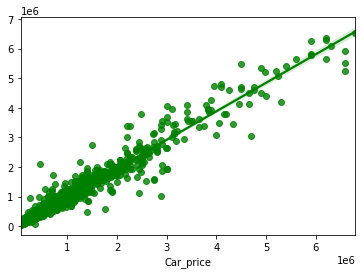

In [136]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb
XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
R2_score = r2_score(y_test,predXGB)*100      # R squared score
print('The R2_Score is:',R2_score) 
# Evaluation Metrics
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predXGB))    
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predXGB))     
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predXGB))) 

# Cross Validation Score
cv_score = (cross_val_score(XGB, x, y, cv=5).mean())*100
print("\nThe Cross Validation Score is:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nThe R2 Score - Cross Validation Score is:", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="g")
plt.show()

- Created XGB Regressor model and checked for its evaluation metrics. The model is giving R2 score as 95.28%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

## Bagging Regressor

The R2_Score is: 94.2593563194224
The Mean Absolute Error is: 95362.68184079601
The Mean Squared Error is: 34601859154.663795
The Root Mean Squared Error is: 186015.74974894949

The Cross Validation Score is: 89.60216046864537

The R2 Score - Cross Validation Score is: 4.657195850777029


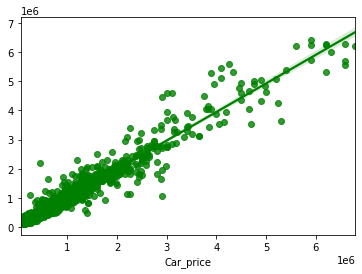

In [137]:
# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
R2_score = r2_score(y_test,predBR)*100      # R squared score
print('The R2_Score is:',R2_score) 
# Evaluation Metrics
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predBR))    
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predBR))     
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predBR))) 
# Cross Validation Score
cv_score = (cross_val_score(BR, x, y, cv=5).mean())*100
print("\nThe Cross Validation Score is:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nThe R2 Score - Cross Validation Score is:", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="g")
plt.show()

- Created Bagging Regressor model and checked for its evaluation metrics. The model is giving R2 score as 94.25%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

## KNeighbors Regressor

The R2_Score is: 82.70898394816177
The Mean Absolute Error is: 149244.0347761194
The Mean Squared Error is: 104221988919.28749
The Root Mean Squared Error is: 322834.3056728753

The Cross Validation Score is: 76.95491950800054

The R2 Score - Cross Validation Score is: 5.75406444016123


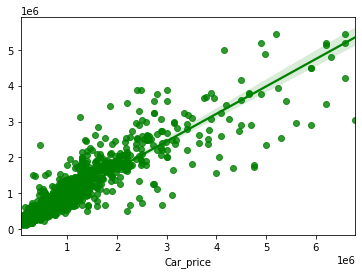

In [138]:
# Checking R2 score for KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
R2_score = r2_score(y_test,predknn)*100      # R squared score
print('The R2_Score is:',R2_score) 
# Evaluation Metrics
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predknn))    
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predknn))     
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predknn))) 

# Cross Validation Score
cv_score = (cross_val_score(knn, x, y, cv=5).mean())*100
print("\nThe Cross Validation Score is:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nThe R2 Score - Cross Validation Score is:", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predknn,color="g")
plt.show()

- Created KNN Regressor model and checked for its evaluation metrics. The model is giving R2 score as 82.70%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

## Model Selection

|Model||R2_Score||Cross_Validation_Score||Difference|
|-------||-------||-------||-------|
|DecisionTreeRegressor||84.074||76.441||7.633|
|RandomForestRegressor||95.401||90.613||4.787|
|ExtraTreesRegressor||95.602||91.318||4.384|
|GradientBoostingRegressor||93.851||89.507||4.344|
|XGBRegressor||95.289||90.976||4.313|
|BaggingRegressor||94.259||89.602||4.657|
|KNeighborsRegrassor||82.708||76.954||5.754|

#### From the difference between R2 score and Cross Validation score, it can be seen that the XGB Regressor has least difference and low evaluation metrics compared to other models. That is XGBoost as a regression gave the best R2 score, MAE, MSE and RMSE values. So we can conclude that XGB Regressor as our best fitting model. Let's try to increase our model score by tuning the best model using different types of hyper parameters.

## Hyper Parameter Tuning

In [165]:
# Let's Use the GridSearchCV to find the best paarameters in XGBRegressor
from sklearn.model_selection import GridSearchCV

#XGB Regressor
parameters = {'n_estimators' : [50,100,150,200],
              'learning_rate':np.arange(0.05,0.5,0.05),
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10]}

I Have used 4 XGBRegressor parameters to be saved under the variable "parameters" that will be used in GridSearchCV for finding the best output.

In [167]:
GCV=GridSearchCV(xgb(),parameters,cv=5)

Assigning a variable to the GridSearchCV function after entering all the necessary inputs.

In [168]:
# Running GridSearchCV
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

Now we use our training data set to make the GridSearchCV aware of all the hyper parameters that needs to be applied on our best model.

In [169]:
# Finding best parameters
GCV.best_params_

{'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}

This gives us the list of parameters which will be used further in our final model creation.

The R2_Score is: 95.71937426972296
The Mean absolute error is: 84148.06754460122
The Mean squared error is: 25801568056.558487
The Root Mean Squared error is: 160628.6651147873


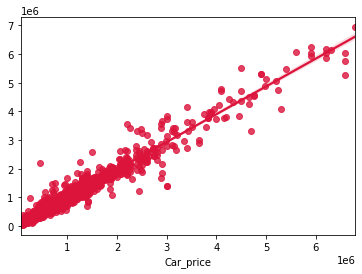

In [171]:
# Creating final model
Car_price_model = xgb(gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=200)

# Prediction
Car_price_model.fit(x_train, y_train)
pred = Car_price_model.predict(x_test)
print('The R2_Score is:',r2_score(y_test,pred)*100)

# Metric Evaluation
print('The Mean absolute error is:',metrics.mean_absolute_error(y_test, pred))
print('The Mean squared error is:',metrics.mean_squared_error(y_test, pred))
print('The Root Mean Squared error is:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Visualizing the predicted values
sns.regplot(y_test,pred,color="crimson")
plt.show()

- We have successfully incorporated the hyper parameter tuning using best parameters of XGB Regressor and the R2 score of the model has been increased after hyperparameter tuning and received the R2 score as 95.71% which is very good.
- From the graph we can observe how our final model is mapping. In the graph we can observe the best fit line which is our actual dataset and the dots are the predictions that our best final model has given.

## Saving the Final model

In [172]:
# Saving the model using joblib library 
import joblib
joblib.dump(Car_price_model,"Used_Car_Price_Prediction.pkl")

['Used_Car_Price_Prediction.pkl']

I am using the joblib option to save the final regression model in the form of .pkl.

## Loading the saved model and predicting Used Car Price

In [173]:
# Loading the saved model
Model=joblib.load("Used_Car_Price_Prediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([458362.75, 540452.2 , 304486.2 , ..., 617743.56, 701768.9 ,
       201981.61], dtype=float32)

These are the predicted price of the used cars.

## Creating DataFrame for the predicted values

In [174]:
Predicted_Used_Car_Price = pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
Predicted_Used_Car_Price

0            1            2             3             4     \
Predicted  458362.75  540452.1875  304486.1875  1.000984e+06  301062.21875   
Original   550000.00  565000.0000  271001.0000  8.600000e+05  225000.00000   

                  5             6           7              8             9     \
Predicted  511273.1875  434107.78125  313026.125  161404.828125  375567.65625   
Original   450000.0000  440000.00000  270000.000  175000.000000  370000.00000   

                 10           11           12          13            14    \
Predicted  380233.875  389368.8125  516382.8125  959630.625  396580.96875   
Original   640000.000  448000.0000  540000.0000  943000.000  420000.00000   

                15           16           17           18           19    \
Predicted  573017.25  434864.8125  1174952.625  441354.3125  863236.0625   
Original   725000.00  425000.0000   550000.000  466000.0000  900000.0000   

                   20          21             22          23        24    \
Predicted  304236.65625  646033.875  148566.953125  301690.375  452177.0   
Original   335000.00000  735000.000  185000.000000  265000.000  485000.0   

                   25           26          27           28        29    \
Predicted  335854.21875  623329.8125  479511.125  307303.0625  836684.0   
Original   290000.00000  600000.0000  435001.000  335000.0000  550000.0   

                 30            31          32           33        34    \
Predicted  683881.125  480155.21875  165203.625  997896.3125  722395.0   
Original   625000.000  595000.00000  175000.000  899000.0000  725000.0   

                   35          36           37           38          39    \
Predicted  8.582558e+05  3017467.25  678407.8125  1184548.125  479245.875   
Original   1.025000e+06  3650000.00  611000.0000  1250000.000  450000.000   

                40         41         42           43            44    \
Predicted  2083763.5  629130.25  6138460.5  511669.5625  521421.09375   
Original   2450000.0  650000.00  6300000.0  350000.0000  595000.00000   

                   45         46         47          48           49    \
Predicted  304591.71875  1304379.0  543782.25  651005.875  648627.6875   
Original   315000.00000   750000.0  586000.00  525000.000  500000.0000   

                  50            51           52             53    \
Predicted  1049416.125  221448.15625  210182.5625  220252.296875   
Original   1045000.000  350000.00000  225000.0000  205000.000000   

                   54          55           56          57         58    \
Predicted  278910.84375  1237606.25  627607.3125  2184734.75  1362756.0   
Original   290000.00000  1410000.00  690000.0000  2269400.00  1295000.0   

                   59          60         61             62           63    \
Predicted  465033.78125  1318591.25  1638392.0  244150.828125  283367.8125   
Original   485000.00000  1475000.00  1300000.0  257000.000000  299000.0000   

                  64            65           66        67          68    \
Predicted  1085837.125  373035.09375  796503.0625  697852.0  1408262.75   
Original   1024000.000  385000.00000  685000.0000  620000.0  1650000.00   

                 69           70            71         72           73    \
Predicted  438888.375  660557.8125  480281.71875  301901.75  1472491.625   
Original   400000.000  693000.0000  545000.00000  210000.00  1590000.000   

                 74           75             76            77    \
Predicted  720439.375  324134.9375  252852.765625  469277.53125   
Original   800000.000  275000.0000  265000.000000  425000.00000   

                    78           79         80           81            82    \
Predicted  255487.546875  221481.1875  633255.25  1970517.625  9.037867e+05   
Original   229000.000000  225000.0000  726000.00  2050000.000  1.050000e+06   

                  83            84           85          86            87    \
Predicted  740621.3125  465646.21875  444606.0625  1014587.75  466597.03125   
Orig

Using regression model, we have got the predicted price of the used cars. From the above output we can observe that predicted values are almost near to the actual values.

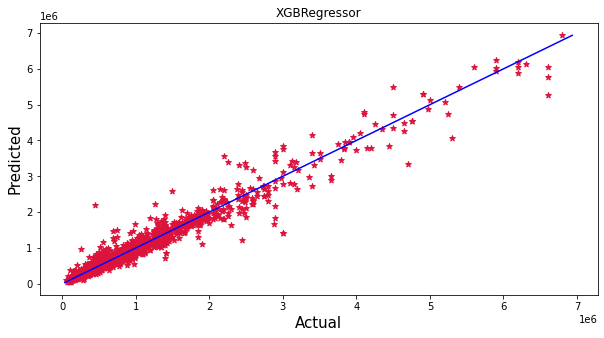

In [175]:
# Visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

The graph shows how our final model is mapping. The plot gives the linear relation between predicted and actual price of the used cars. The blue line is the best fitting line which gives the actual values/data and red dots gives the predicted values/data.

In [176]:
# Saving the predicted car price values in csv file
Predicted_Used_Car_Price.to_csv("Predicted_Used_Car_Price.csv",index=False)

## Conclusion
Key Findings and Conclusion of the Study:

- The case study aims to give an idea of applying Machine Learning algorithms to predict the sale price of the used cars. After the completion of this project, we got an insight of how to collect data, pre-processing the data, analyze the data, cleaning the data and building a model.
- First we collected the used cars data from website www.cardekho.com and it was done by using Web scraping. The framework used for web scraping was Selenium, which has an advantage of automating our process of collecting data. We collected almost 9677 of data which contained the selling price of the used cars and other related features. Then, the scrapped data was saved in a excel file so that we can use further and analyse the data.
- Then we loaded the dataset and have done data cleaning, EDA process and pre-processing techniques like checking outliers, skewness, correlation, scaling data etc and got better insights from data visualization.
- From the visualizations we got to know that the continuous numerical variables having some strong positive linear relation with the label "Car_Price". By comparing car price and categorical variables we got to know that the cars having automatic gear transmission, cars from the city Bangalore, cars using petrol and diesel as fuels, cars having the brands Benz and BMW and cars with 5-7 seating capacity have high sale price. While comparing continuous numerical variables and Car_Price we found that cars which are having good milage, engine displacement, less running in kms have good linear relation with the price that is the cars with this kind of qualities have high selling prices.
- After separating our train and test data, we started running different machine learning regression algorithms to find out the best performing model on the basis of different metrics like R2 Score, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error. We tried many algorithms like Decision Tree Regressor, Random Forest Regressor, Extra Trees Regressor, GradientBoosting Regressor, Extreme Gradient Boosting Regressor (XGBoost), Bagging Regressor and KNeighbors Regressor.
- We got XGBoost Regressor as the best model among all the models as it gave least difference of R2 score and cross validation score and also the low evaluation metrics compared to other models. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. The R2 score increased after tuning. So we concluded that XGBoost Regressor as the best algorithm as it was giving high R2 score after tuning.
- After that we saved the model in a pickle with a filename in order to use whenever we require. Then we loaded the saved file and predicted the values.
- Overall, we can say that this dataset is good for predicting the sale price of used cars using regression analysis and conclude that XGBoost Regressor is the best working algorithm model we obtained. We can improve the data by adding some more features.

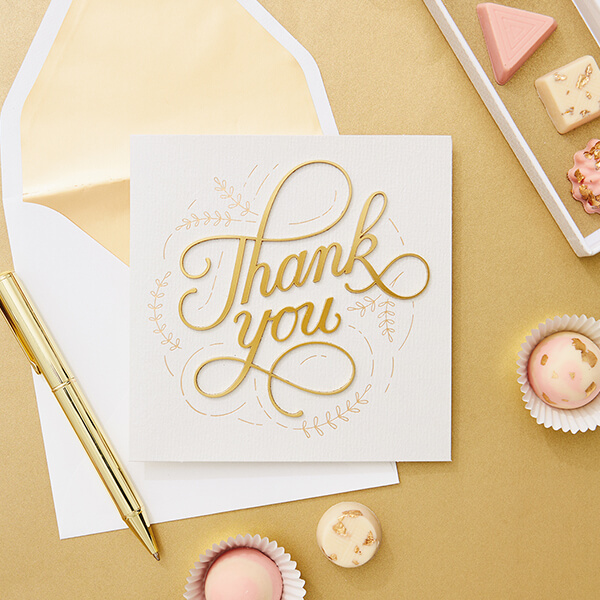